### Death toll data from Wikipedia

This is an attempt to summarise war death toll data from Wikipedia: https://en.wikipedia.org/wiki/List_of_wars_by_death_toll

I downloaded the data in April 2024. A similar topic has been recently explored in https://ourworldindata.org/war-and-peace, but their data starts at 1800. I'm not sure how Wikipedia data compares to other sources in terms of accuracy. My goal was to find the most intense wars when it comes to death toll and the longest wars.

The general approach is to extract and clean the dates and death ranges.

In [1]:
import pandas as pd
w = pd.read_csv(r"C:\Users\karol\projects\wikiWar\war_data_04_2024.csv")
w.head(30)

,War,Death\nrange,Date,Combatants,Location,Notes
0,Bar Kokhba Revolt,"580,000",132–136,Roman Empire vs. Jews,Middle East,– Also known as the Third Jewish–Roman War\n– ...
1,Chinese Warring States,"1,500,000+",c. 475 BC – 221 BC,Seven great powers of China,China,"Estimated at 1,500,000 before Qin's wars of un..."
2,Cimbrian War,"410,000–650,000",113 BC–101 BC,Roman Republic vs. Cimbri and Teutones,Western Europe,Part of the Germanic Wars
3,Conquests of Cyrus the Great,"100,000+",549 BC–530 BC,Persian Empire vs. various states,Middle East,Number given is the sum of all deaths in battl...
4,First Jewish–Roman War,"250,000–1,100,000[5]",66–73,Roman Empire vs. Jews,Middle East,– Part of Jewish–Roman Wars
5,First Punic War,"400,000+",264 BC–241 BC,Roman Republic vs. Carthaginian Empire,Southern Europe / North Africa,Part of the Punic Wars
6,Gallic Wars,"1,000,000+",58 BC–50 BC,Roman Republic vs. Gallic tribes,France,NaN
7,Greco–Persian Wars,"300,000+",499 BC–449 BC,Greek City-States vs. Persian Empire,Greece,NaN
8,Hunnic Reclaims,"165,000+\n[citation needed]",395–453,Roman Empire vs. Hunnic Empire,Europe,Number given is the sum of all deaths in battl...
9,Iceni Revolt,"150,000+[4]",60–61,Roman Empire vs. Celtic tribes,England,Year is uncertain – Part of the Roman Conquest...


In [2]:
w[w['War'] == 'World War I']


,War,Death\nrange,Date,Combatants,Location,Notes
111,World War I,"17,000,000-40,000,000",1914–1918,Allied Powers vs. Central Powers,Worldwide,[27] – Also known as the Great War


In [3]:

#use start date as reference point, not the middle date

import re

def extractFirstNumber(stringWithNumbers):
    try:
        # Find the first group of digits, including commas
        match = re.search(r'[\d,]+', stringWithNumbers)
        
        if match:
            # Replace commas and convert to an integer
            return int(match.group())
        else:
            return stringWithNumbers
    except ValueError:
        return stringWithNumbers

def extractSecondNumber(stringWithNumbers):
    try:
        # Match the input string with one of the specified formats
        #match = re.match(r'(\d+)-(\d+)|(\d+)-present|(\d+)|*-\s*(\d+)', stringWithNumbers)
        #match = re.search(r'–\s*(\d+)', t)
        match = re.search(r'–\s*(\d+).*|(\d+)–present', stringWithNumbers)

        
        if match:
            # Check which pattern matched
            if match.group(1):  # Format: "111-111212"
                return int(match.group(1))
            elif match.group(2):  # Format: "3434-present"
                return 2024
         
           
          
        
    except:
        pass
    
    # If no match or error occurred, return the original input as an integer
    return int(stringWithNumbers)

In [4]:
#t ='c. 475 BC – 221 BC'
#t = '12121'
#t ='1918–present'
t = '264 BC–241 BC'
#match = re.search(r'–\s*(\d+)', t)
extractSecondNumber(t)
#remember to use search instead of match

241

In [5]:
w['startDate'] = w['Date'].map(extractFirstNumber)
w['endDate'] = w['Date'].map(extractSecondNumber)



In [6]:
w

,War,Death\nrange,Date,Combatants,Location,Notes,startDate,endDate
0,Bar Kokhba Revolt,"580,000",132–136,Roman Empire vs. Jews,Middle East,– Also known as the Third Jewish–Roman War\n– ...,132,136
1,Chinese Warring States,"1,500,000+",c. 475 BC – 221 BC,Seven great powers of China,China,"Estimated at 1,500,000 before Qin's wars of un...",475,221
2,Cimbrian War,"410,000–650,000",113 BC–101 BC,Roman Republic vs. Cimbri and Teutones,Western Europe,Part of the Germanic Wars,113,101
3,Conquests of Cyrus the Great,"100,000+",549 BC–530 BC,Persian Empire vs. various states,Middle East,Number given is the sum of all deaths in battl...,549,530
4,First Jewish–Roman War,"250,000–1,100,000[5]",66–73,Roman Empire vs. Jews,Middle East,– Part of Jewish–Roman Wars,66,73
...,...,...,...,...,...,...,...,...
196,Yemeni Civil War,"377,000+",2014–present,Yemen's Supreme Political Council vs. Hadi Gov...,Yemen,UNDP estimate for the end of 2021. 60% attribu...,2014,2024
197,Tigray War,"162,000–378,000+ (Total civilian casualties in...",2020–2022,UFEFCF vs. Ethiopian and Eritrean Government,"Ethiopia (Tigray, Afar and Amhara Regions)",Part of the Ethiopian civil conflict.,2020,2022
198,Myanmar Civil War,"48,519",2021–present,National Unity Government vs. State Administra...,Myanmar,Part of the Internal conflict in Myanmar.,2021,2024
199,Russian invasion of Ukraine,"300,000+",2022–present,Russia vs. Ukraine,Ukraine,Estimates of deaths vary widely.[145][146] The...,2022,2024


In [7]:
#check whether all dates got extracted

# This approach directly filters rows where the conversion to numeric results in NaN, 
# indicating that those rows contain string values in the 'startDate' column.

rows_with_strings = w[pd.to_numeric(w['startDate'], errors='coerce').isna()]
rows_with_strings

,War,Death\nrange,Date,Combatants,Location,Notes,startDate,endDate


In [8]:
r = w[pd.to_numeric(w['endDate'], errors='coerce').isna()]
r

,War,Death\nrange,Date,Combatants,Location,Notes,startDate,endDate


In [9]:
#create a BC column
w['BC'] = w['Date'].str.contains('BC')

In [10]:
w = w.rename(columns = {'Death\nrange':'casualties'})


Extract higher death toll range and lower death toll range and put them in separate columns

In [11]:
#extract higher range or any number if there is just one number
import re
def extractFirstNumber(stringWithNumbers):
    try:
        # Find the first group of digits, including commas
        match = re.search(r'[\d,]+', stringWithNumbers)
        
        if match:
            # Replace commas and convert to an integer
            return int(match.group().replace(',', ''))
        else:
            return stringWithNumbers
    except ValueError:
        return stringWithNumbers

def extractSecondOrFirstNumber(stringWithNumbers):
    
    try:
        # Remove commas, then find all groups of digits
        stringWithNumbers =stringWithNumbers.replace(',', '')
        matches = re.findall(r'\d+',stringWithNumbers)
        if matches:
            if len(matches) == 1:
                return int(matches[0])
            elif len(matches) == 2 and '[' in stringWithNumbers and ']' in stringWithNumbers:
                # Check if the second value is in brackets
                return int(matches[0])
            else:
                return int(matches[1])
        else:
            return stringWithNumbers
    except ValueError:
        return stringWithNumbers
    

In [12]:
w['higherRange'] = w['casualties'].map(extractSecondOrFirstNumber)
w['lowerRange'] = w['casualties'].map(extractFirstNumber)

In [13]:
df = w[['War', 'BC', 'lowerRange', 'higherRange', 'startDate', 'endDate', 'Combatants', 'Location']]

In [14]:
#split data into bce and ce
bcedf = df[df['BC']==True]
cedf = df[df['BC']==False]

In [15]:
#check for null values
# Check for null values in the first column
cedf['lowerRange'].isnull().any()
cedf['higherRange'].isnull().any()
 

False

In [16]:
import numpy as np
#df['geom_mean'] = np.sqrt(df['lowerRange'] * df['higherRange'])
cedf.loc[:, 'geom_mean'] = np.sqrt(cedf['lowerRange'] * cedf['higherRange'])
cedf.loc[:,'aritm_mean'] = (cedf['lowerRange'] + cedf['higherRange'])/2

C:\Users\karol\AppData\Local\Temp\ipykernel_40056\485431737.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cedf.loc[:, 'geom_mean'] = np.sqrt(cedf['lowerRange'] * cedf['higherRange'])
C:\Users\karol\AppData\Local\Temp\ipykernel_40056\485431737.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cedf.loc[:,'aritm_mean'] = (cedf['lowerRange'] + cedf['higherRange'])/2


In [17]:
#get the duration
cedf['duration'] = (cedf['endDate'] - cedf['startDate'])+1
#add 1 year so wars that happend withing 1 year have duration of 1

C:\Users\karol\AppData\Local\Temp\ipykernel_40056\999236973.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cedf['duration'] = (cedf['endDate'] - cedf['startDate'])+1


In [18]:
cedf


,War,BC,lowerRange,higherRange,startDate,endDate,Combatants,Location,geom_mean,aritm_mean,duration
0,Bar Kokhba Revolt,False,580000,580000,132,136,Roman Empire vs. Jews,Middle East,5.800000e+05,580000.0,5
4,First Jewish–Roman War,False,250000,1100000,66,73,Roman Empire vs. Jews,Middle East,5.244044e+05,675000.0,8
8,Hunnic Reclaims,False,165000,165000,395,453,Roman Empire vs. Hunnic Empire,Europe,1.650000e+05,165000.0,59
9,Iceni Revolt,False,150000,150000,60,61,Roman Empire vs. Celtic tribes,England,1.500000e+05,150000.0,2
10,Jewish–Roman Wars,False,1270000,2000000,66,136,Roman Empire vs. Jews,Middle East/North Africa,1.593738e+06,1635000.0,71
...,...,...,...,...,...,...,...,...,...,...,...
196,Yemeni Civil War,False,377000,377000,2014,2024,Yemen's Supreme Political Council vs. Hadi Gov...,Yemen,3.770000e+05,377000.0,11
197,Tigray War,False,162000,378000,2020,2022,UFEFCF vs. Ethiopian and Eritrean Government,"Ethiopia (Tigray, Afar and Amhara Regions)",2.474591e+05,270000.0,3
198,Myanmar Civil War,False,48519,48519,2021,2024,National Unity Government vs. State Administra...,Myanmar,4.851900e+04,48519.0,4
199,Russian invasion of Ukraine,False,300000,300000,2022,2024,Russia vs. Ukraine,Ukraine,3.000000e+05,300000.0,3


Check whether there is a big difference between aritmetic and geomeric mean

In [19]:
#calculate the death toll to war length ratio
cedf['deathRateGM'] = cedf['geom_mean'] / cedf['duration']
cedf['deathRateAM'] = cedf['aritm_mean'] / cedf['duration']





C:\Users\karol\AppData\Local\Temp\ipykernel_40056\3753692122.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cedf['deathRateGM'] = cedf['geom_mean'] / cedf['duration']
C:\Users\karol\AppData\Local\Temp\ipykernel_40056\3753692122.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cedf['deathRateAM'] = cedf['aritm_mean'] / cedf['duration']


In [20]:
sorted_df_g = cedf.sort_values(by='geom_mean', ascending=False)


In [21]:
sorted_df_a = cedf.sort_values(by='aritm_mean', ascending=False)

In [22]:
sorted_df_g.head(30)

,War,BC,lowerRange,higherRange,startDate,endDate,Combatants,Location,geom_mean,aritm_mean,duration,deathRateGM,deathRateAM
123,World War II,False,80000000,80000000,1939,1945,Allied powers vs. Axis Powers,Worldwide,8.000000e+07,80000000.0,7,1.142857e+07,1.142857e+07
18,Three Kingdoms War,False,36000000,40000000,184,280,Wei vs. Shu vs. Wu,China,3.794733e+07,38000000.0,97,3.912096e+05,3.917526e+05
84,Taiping Rebellion,False,20000000,70000000,1850,1864,Qing China vs. Taiping Heavenly Kingdom,China,3.741657e+07,45000000.0,15,2.494438e+06,3.000000e+06
30,Mongol invasions and conquests,False,30000000,40000000,1206,1368,Mongol Empire vs. Several Eurasian states,Eurasia,3.464102e+07,35000000.0,163,2.125216e+05,2.147239e+05
111,World War I,False,17000000,40000000,1914,1918,Allied Powers vs. Central Powers,Worldwide,2.607681e+07,28500000.0,5,5.215362e+06,5.700000e+06
50,Transition from Ming to Qing,False,25000000,25000000,1616,1683,Qing China vs. Ming China vs. peasant rebels l...,China,2.500000e+07,25000000.0,68,3.676471e+05,3.676471e+05
122,Second Sino-Japanese War,False,20000000,25000000,1937,1945,Republic of China and allies vs. Japan,China,2.236068e+07,22500000.0,9,2.484520e+06,2.500000e+06
25,An Lushan Rebellion,False,13000000,36000000,755,763,Tang dynasty China and Islamic Empire vs. Yan ...,China,2.163331e+07,24500000.0,9,2.403701e+06,2.722222e+06
33,Conquests of Timur,False,8000000,20000000,1370,1405,Timurid Empire vs. several middle eastern states,Eurasia,1.264911e+07,14000000.0,36,3.513642e+05,3.888889e+05
92,Dungan Revolt,False,8000000,20000000,1862,1877,Qing China vs. Hui vs. Kashgaria,China,1.264911e+07,14000000.0,16,7.905694e+05,8.750000e+05


In [23]:
sorted_df_a.head(30)

,War,BC,lowerRange,higherRange,startDate,endDate,Combatants,Location,geom_mean,aritm_mean,duration,deathRateGM,deathRateAM
123,World War II,False,80000000,80000000,1939,1945,Allied powers vs. Axis Powers,Worldwide,8.000000e+07,80000000.0,7,1.142857e+07,1.142857e+07
84,Taiping Rebellion,False,20000000,70000000,1850,1864,Qing China vs. Taiping Heavenly Kingdom,China,3.741657e+07,45000000.0,15,2.494438e+06,3.000000e+06
18,Three Kingdoms War,False,36000000,40000000,184,280,Wei vs. Shu vs. Wu,China,3.794733e+07,38000000.0,97,3.912096e+05,3.917526e+05
30,Mongol invasions and conquests,False,30000000,40000000,1206,1368,Mongol Empire vs. Several Eurasian states,Eurasia,3.464102e+07,35000000.0,163,2.125216e+05,2.147239e+05
111,World War I,False,17000000,40000000,1914,1918,Allied Powers vs. Central Powers,Worldwide,2.607681e+07,28500000.0,5,5.215362e+06,5.700000e+06
50,Transition from Ming to Qing,False,25000000,25000000,1616,1683,Qing China vs. Ming China vs. peasant rebels l...,China,2.500000e+07,25000000.0,68,3.676471e+05,3.676471e+05
25,An Lushan Rebellion,False,13000000,36000000,755,763,Tang dynasty China and Islamic Empire vs. Yan ...,China,2.163331e+07,24500000.0,9,2.403701e+06,2.722222e+06
122,Second Sino-Japanese War,False,20000000,25000000,1937,1945,Republic of China and allies vs. Japan,China,2.236068e+07,22500000.0,9,2.484520e+06,2.500000e+06
33,Conquests of Timur,False,8000000,20000000,1370,1405,Timurid Empire vs. several middle eastern states,Eurasia,1.264911e+07,14000000.0,36,3.513642e+05,3.888889e+05
92,Dungan Revolt,False,8000000,20000000,1862,1877,Qing China vs. Hui vs. Kashgaria,China,1.264911e+07,14000000.0,16,7.905694e+05,8.750000e+05


### Raw death vs. year, intensity as third variable/colour

1. Fix Iraq invasion datapoint

The Iraq War (Arabic: حرب العراق, romanized: ḥarb al-ʿirāq) was a protracted armed conflict in Iraq from 2003 to 2011. It began with the invasion of Iraq by the United States-led coalition that overthrew the Ba'athist government of Saddam Hussein. The conflict continued for much of the next decade as an insurgency emerged to oppose the coalition forces and the post-invasion Iraqi government. US troops were officially withdrawn in 2011.

---
The original table includes US invasion of Iraq as well as The Iraq War: remove the Invasion entry as it's included in the Iraq War. Also, remove War on Terror as it includes many wars already present as separate datapoints.

In [24]:
cedf = cedf[df['War'] != "US Invasion of Iraq"]
cedf = cedf[df['War'] != "War on terror"]



C:\Users\karol\AppData\Local\Temp\ipykernel_40056\3459960774.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cedf = cedf[df['War'] != "US Invasion of Iraq"]
C:\Users\karol\AppData\Local\Temp\ipykernel_40056\3459960774.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cedf = cedf[df['War'] != "War on terror"]


In [25]:
#remove French invasion of Russia because it's part of Napoleonic wars
cedf = cedf[df['War'] != "French invasion of Russia"]


C:\Users\karol\AppData\Local\Temp\ipykernel_40056\1748760741.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cedf = cedf[df['War'] != "French invasion of Russia"]


In [26]:
# Define the new variable 'Location_f'
cedf['Location_f'] = np.where(cedf['Location'] == 'China', 'China',
                                       np.where(cedf['Location'] == 'Worldwide', 'Worldwide', 'Other'))



### After 2nd reddit feedback

https://www.reddit.com/r/dataisbeautiful/comments/1cdi5vd/oc_top_20_most_intense_wars_second_attempt/#lightbox

- geom or arithmetic mean
- intensity as bubble size
- use log scale for y


In [27]:
def standard_notation_formatter(x):
    return f'{x:.2f}'  # Format the number with 2 decimal places

# Set the display format for float values to the custom formatter function
pd.options.display.float_format = standard_notation_formatter

In [28]:
def startEndRange(start, end):
    if start == end:
        return str(start)
    else:
        return f'({start}-{end})'
cedf['startEnd'] = cedf.apply(lambda row: startEndRange(row['startDate'], row['endDate']), axis=1)


In [29]:
def deathRangeFormatted(deaths):
    deaths_rounded = round(deaths / 1000000, 1)  # Round to 1 decimal place
    return f'~{deaths_rounded} millions'
cedf['deathsFormatted'] = cedf.apply(lambda row: deathRangeFormatted(row['geom_mean']), axis=1)

In [30]:
top30Deadliest =cedf.sort_values(by = 'geom_mean', ascending = False).head(30)

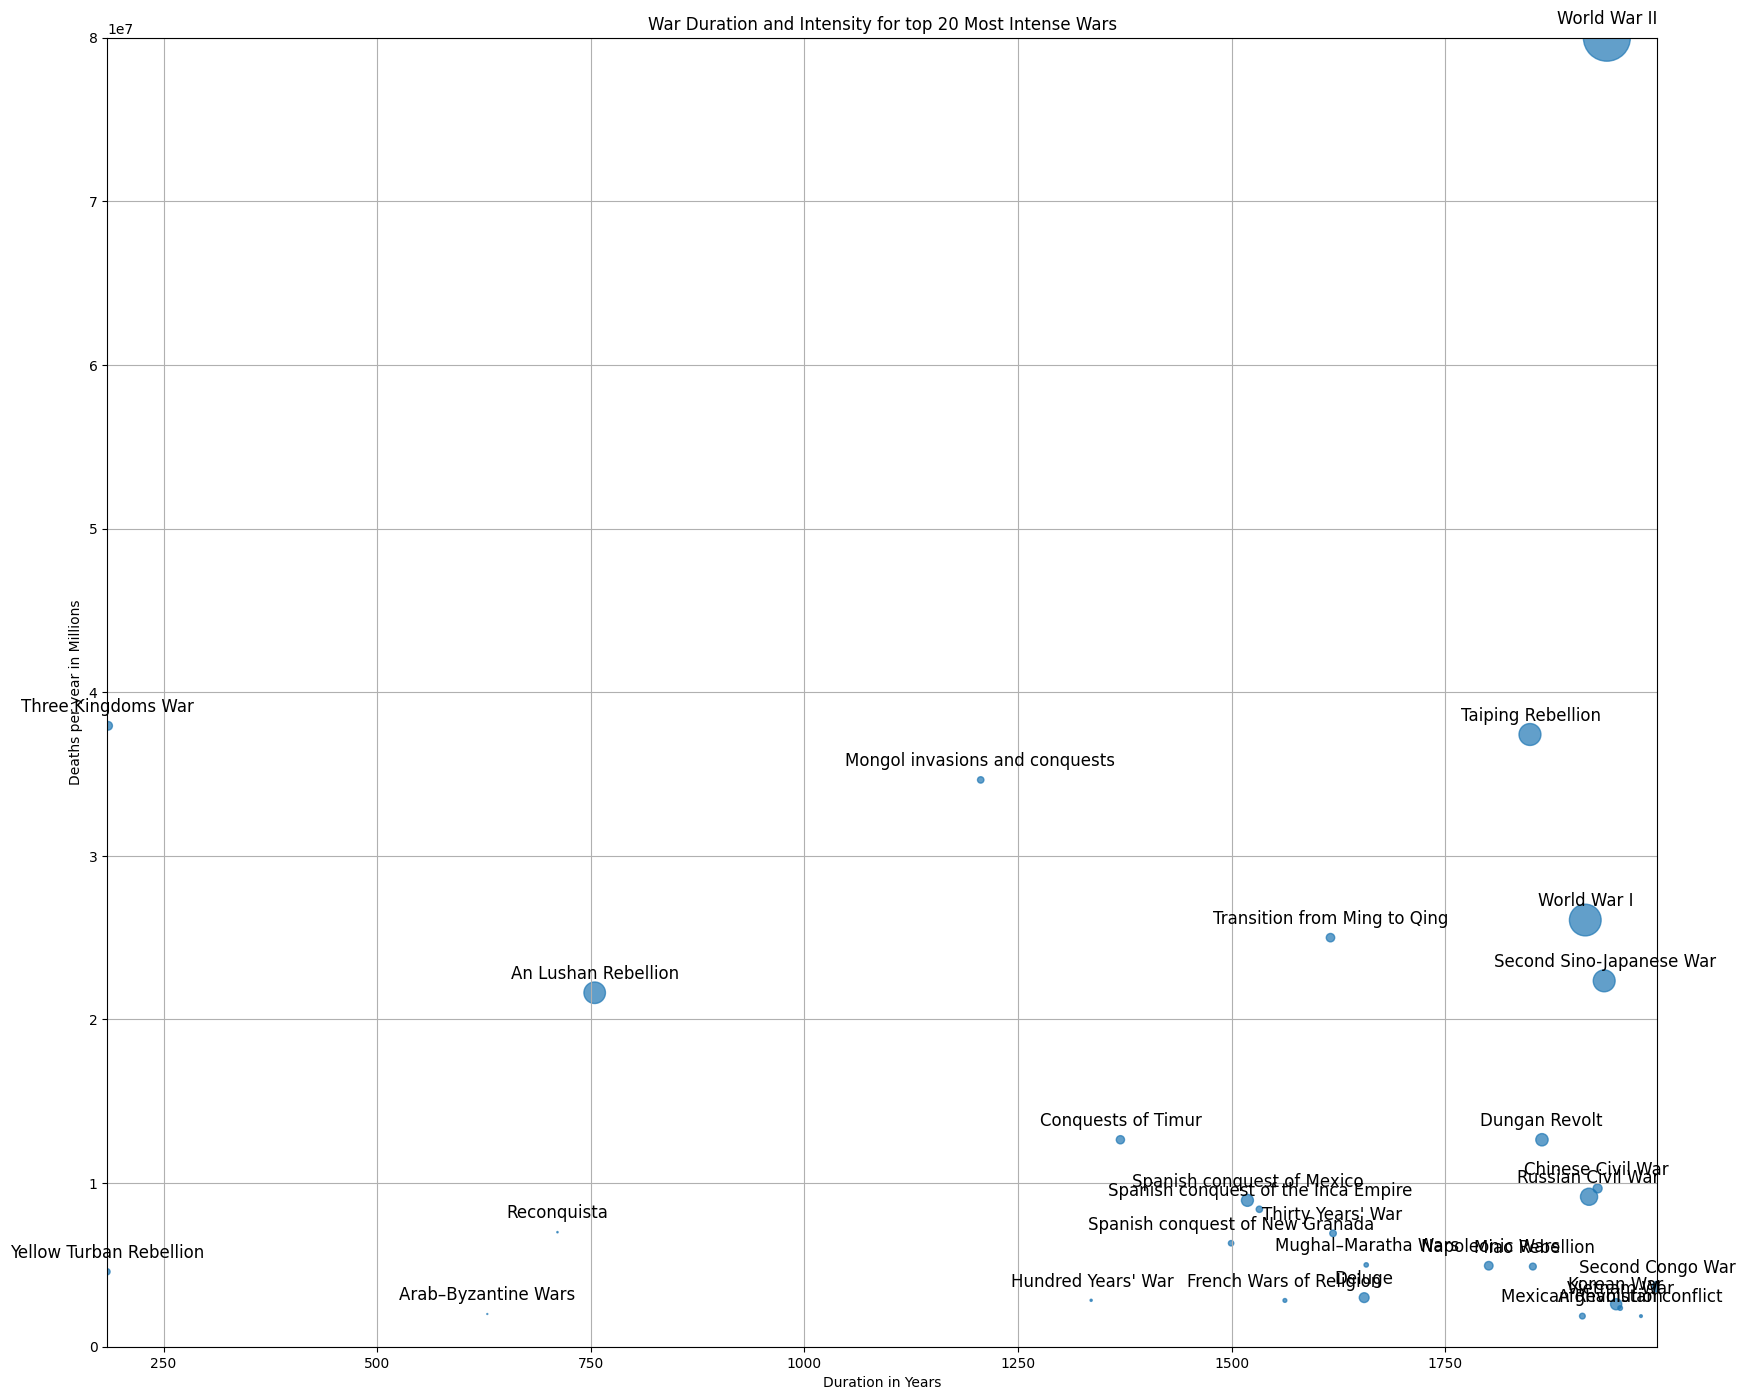

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter

plt.figure(figsize=(20, 17))

# Plot AD data
scatter = plt.scatter(top30Deadliest['startDate']+ np.random.normal(0, size=len(top30Deadliest['duration'])), top30Deadliest['geom_mean']+np.random.normal(0, size=len( top30Deadliest['deathRateGM'])), s= top30Deadliest['deathRateGM'] / 10000, alpha=0.7)


# Set custom limits for better visibility
plt.xlim(min(top30Deadliest['startDate']), max(top30Deadliest['startDate']))
plt.ylim(0, max( top30Deadliest['geom_mean']))  # Adjusted upper limit up to 9M

# Add ticks every 50 years starting from 0 to 2100
#plt.xticks(range(100, 2100, 100))

#Add 'war' field as multiline text on each bubble
for x, y, war in zip(top30Deadliest['startDate'], top30Deadliest['geom_mean'], top30Deadliest['War']):
    plt.annotate(war, (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=12, color='black')
    
    
# for x, y, war in zip(top20Deadliest['duration'], top20Deadliest['deathRate'], top20Deadliest['War']):
#     if len(war)>1:
#         lines = war.split()
#         text = '\n'.join(lines)
#     else:
#         text = war
#     plt.annotate(text, (x, y), textcoords="offset points", xytext=(0, -17), ha='center', fontsize=12, color='black')

    
    

# Customize the plot
plt.title('War Duration and Intensity for top 20 Most Intense Wars')
plt.xlabel('Duration in Years')
plt.ylabel('Deaths per year in Millions')
#plt.legend()

plt.grid(True)

# Improve layout
# plt.tight_layout()

plt.show()

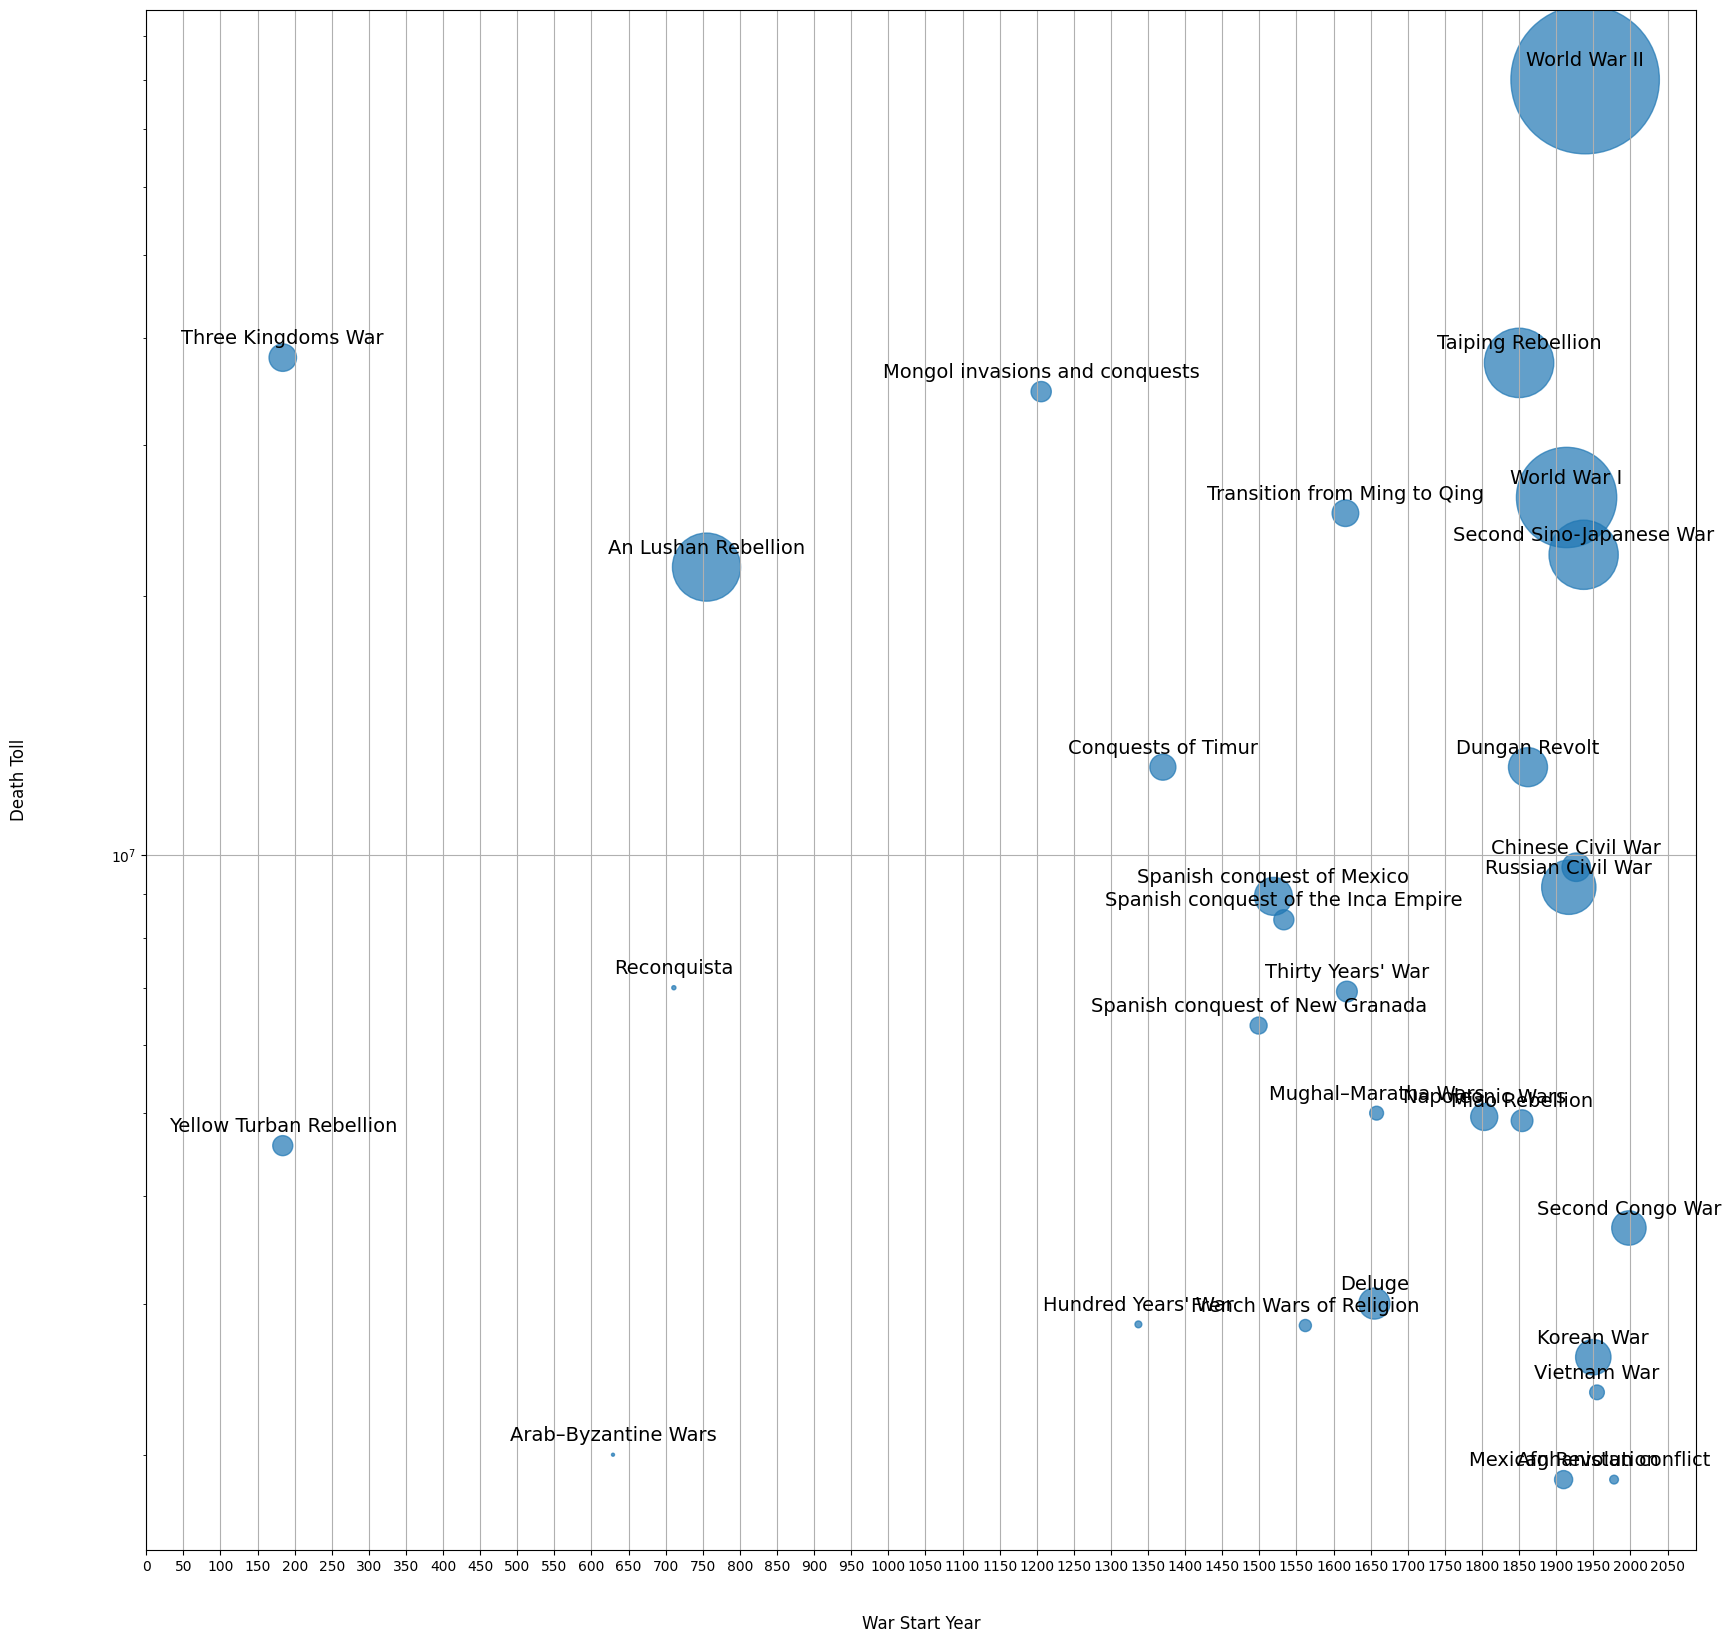

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
# Assuming 'top20Deadliest' is your DataFrame containing the data

plt.figure(figsize=(20, 20))

# Scatter plot
plt.scatter(top30Deadliest['startDate'], top30Deadliest['geom_mean'], s=[size / 1000 for size in top30Deadliest['deathRateGM']], alpha=0.7)

for x, y, war in zip(top30Deadliest['startDate'], top30Deadliest['geom_mean'], top30Deadliest['War']):
    plt.annotate(war, (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=14, color='black')
# for x, y, war in zip(top20Deadliest['duration'], top20Deadliest['deathRate'], top20Deadliest['startEnd']):   
#     plt.annotate(war, (x, y), textcoords="offset points", xytext=(0, 0), ha='center', fontsize=10, color='black')
# for x, y, war in zip(top20Deadliest['duration'], top20Deadliest['deathRate'], top20Deadliest['deathsFormatted']):   
#     plt.annotate(war, (x, y), textcoords="offset points", xytext=(0, -10), ha='center', fontsize=10, color='black')

# Set y-axis scale to logarithmic
plt.yscale('log')

plt.xlabel('War Start Year', labelpad=30, fontsize=12)
plt.ylabel('Death Toll', labelpad=60, fontsize=12)

plt.grid(which='major', axis='both')
plt.xticks(np.arange(0, 2070, 50))

plt.show()

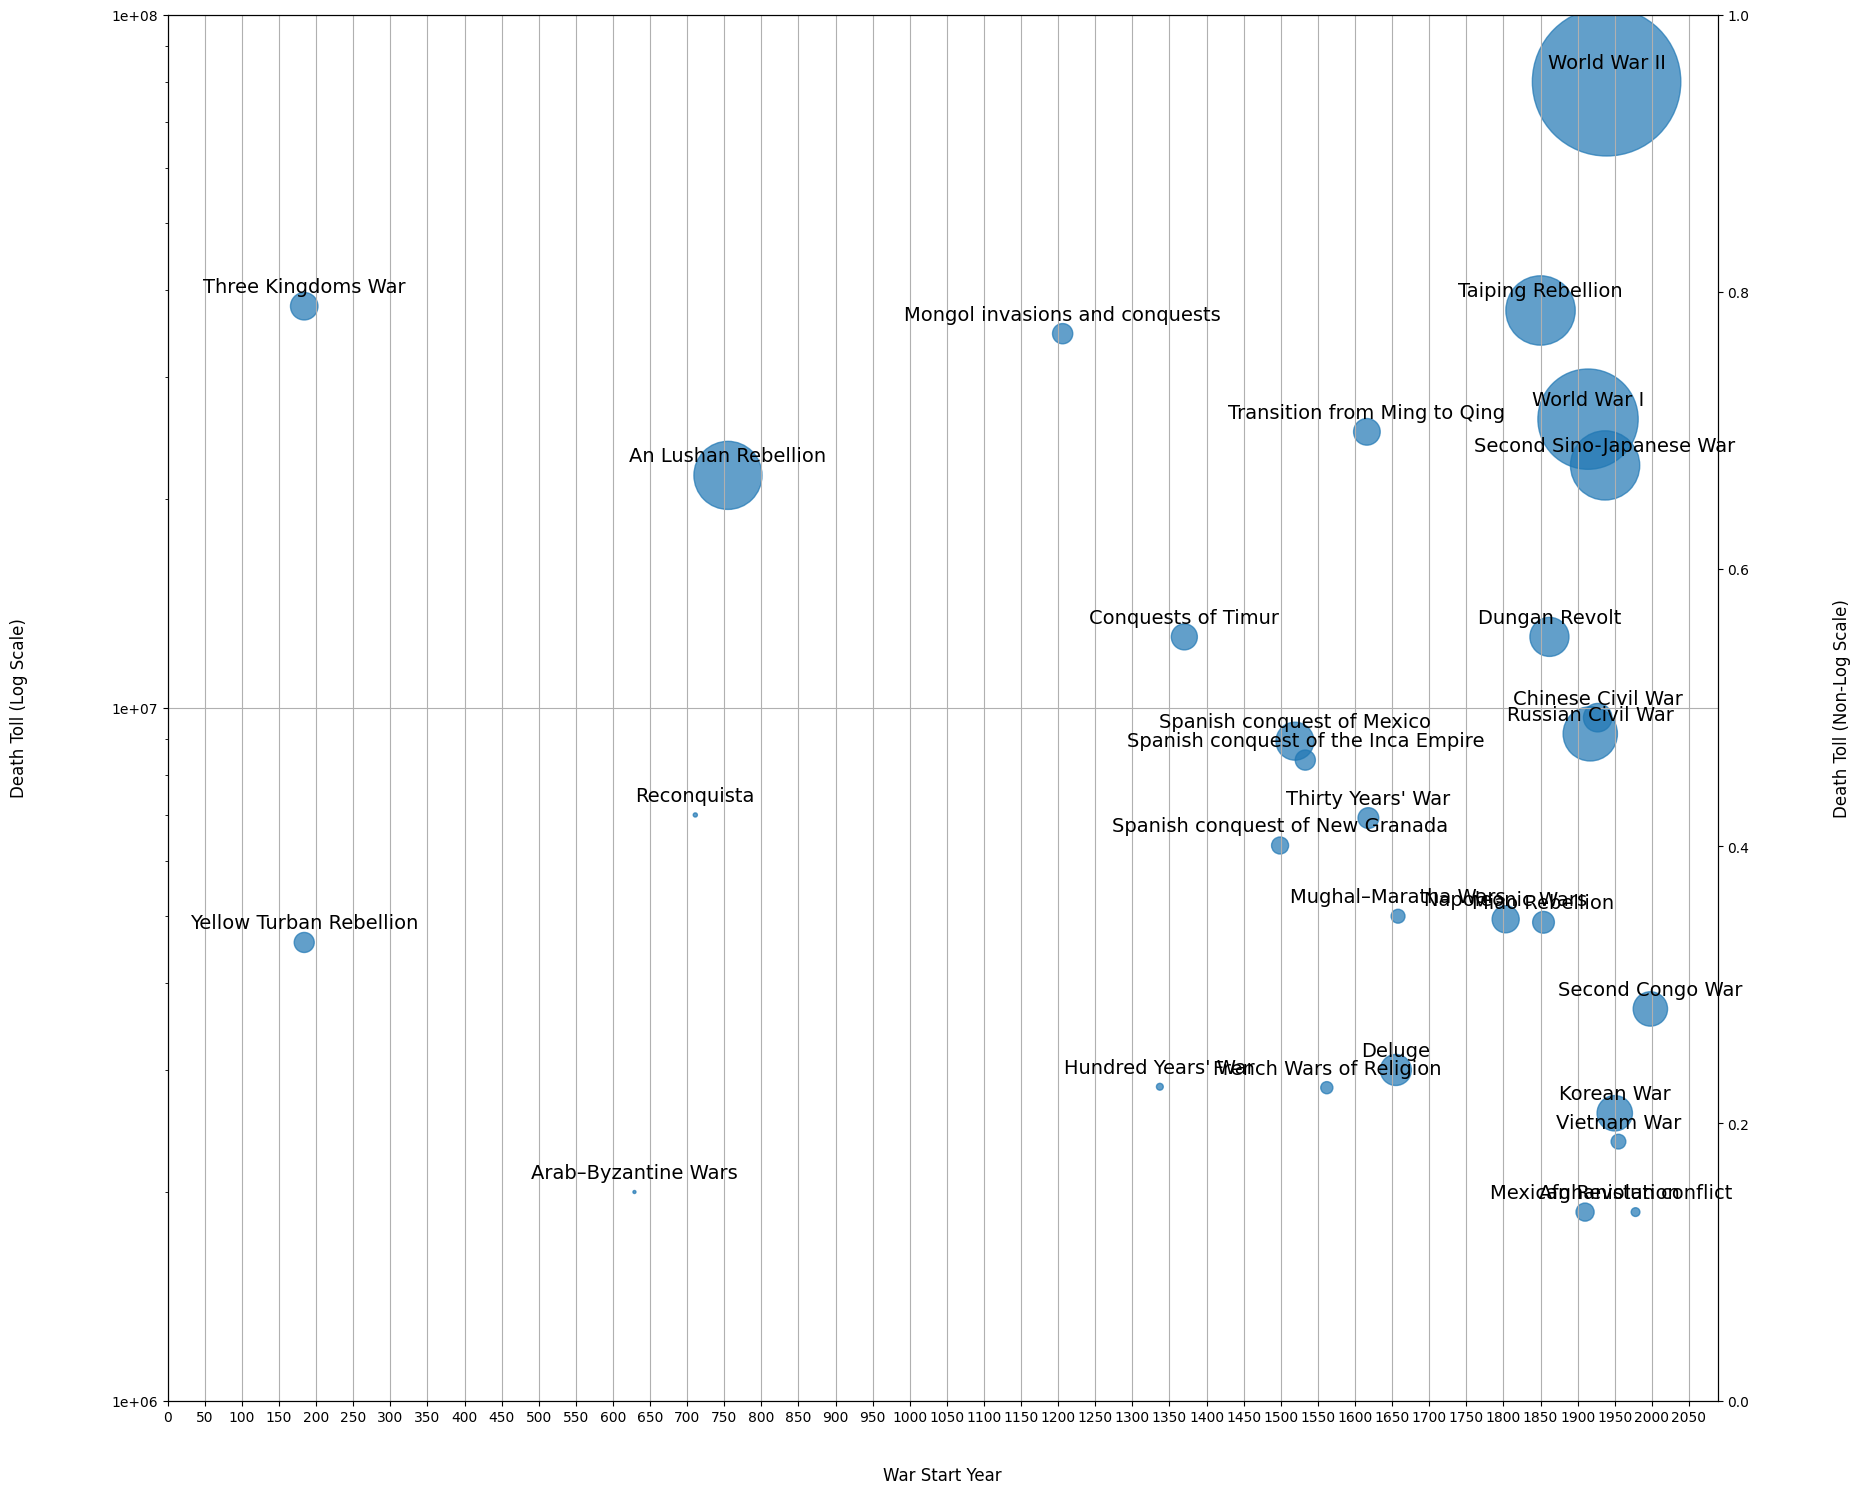

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
# Assuming 'top20Deadliest' is your DataFrame containing the data

fig, ax1 = plt.subplots(figsize=(20, 18))

# Scatter plot
ax1.scatter(top30Deadliest['startDate'], top30Deadliest['geom_mean'], s=[size / 1000 for size in top30Deadliest['deathRateGM']], alpha=0.7)

for x, y, war in zip(top30Deadliest['startDate'], top30Deadliest['geom_mean'], top30Deadliest['War']):
    ax1.annotate(war, (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=14, color='black')

# Set y-axis scale to logarithmic
ax1.set_yscale('log')

# Set y-axis ticks for logarithmic scale
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:g}'.format(x)))
ax1.yaxis.set_ticks([10**i for i in range(6, 9)])  # Adjust the range as needed

ax1.set_xlabel('War Start Year', labelpad=30, fontsize=12)
ax1.set_ylabel('Death Toll (Log Scale)', labelpad=60, fontsize=12)

# # Create a secondary y-axis with non-logarithmic values
ax2 = ax1.twinx()
ax2.set_ylabel('Death Toll (Non-Log Scale)', labelpad=60, fontsize=12)


# Set y-axis ticks for non-logarithmic scale
# non_log_ticks = np.arange(0, 100, 10) * 10**6
# ax2.set_yticks(non_log_ticks)
# # Set y-axis ticks and labels for non-logarithmic scale
# non_log_ticks = [10**7, 20*10**6, 30*10**6, 50*10**6, 60*10**6, 70*10**6, 80*10**6]
# non_log_labels = ['10', '20', '30', '50', '60', '70', '80']
# ax2.set_yticks(non_log_ticks)
# ax2.set_yticklabels(non_log_labels)

# Show the plot
#plt.grid(which='major', axis='both')
ax1.grid(True)
# Align grid lines with specific values on the secondary y-axis (ax2)
#ax1.yaxis.set_major_locator(plt.FixedLocator(non_log_ticks))
plt.xticks(np.arange(0, 2070, 50))
plt.show()

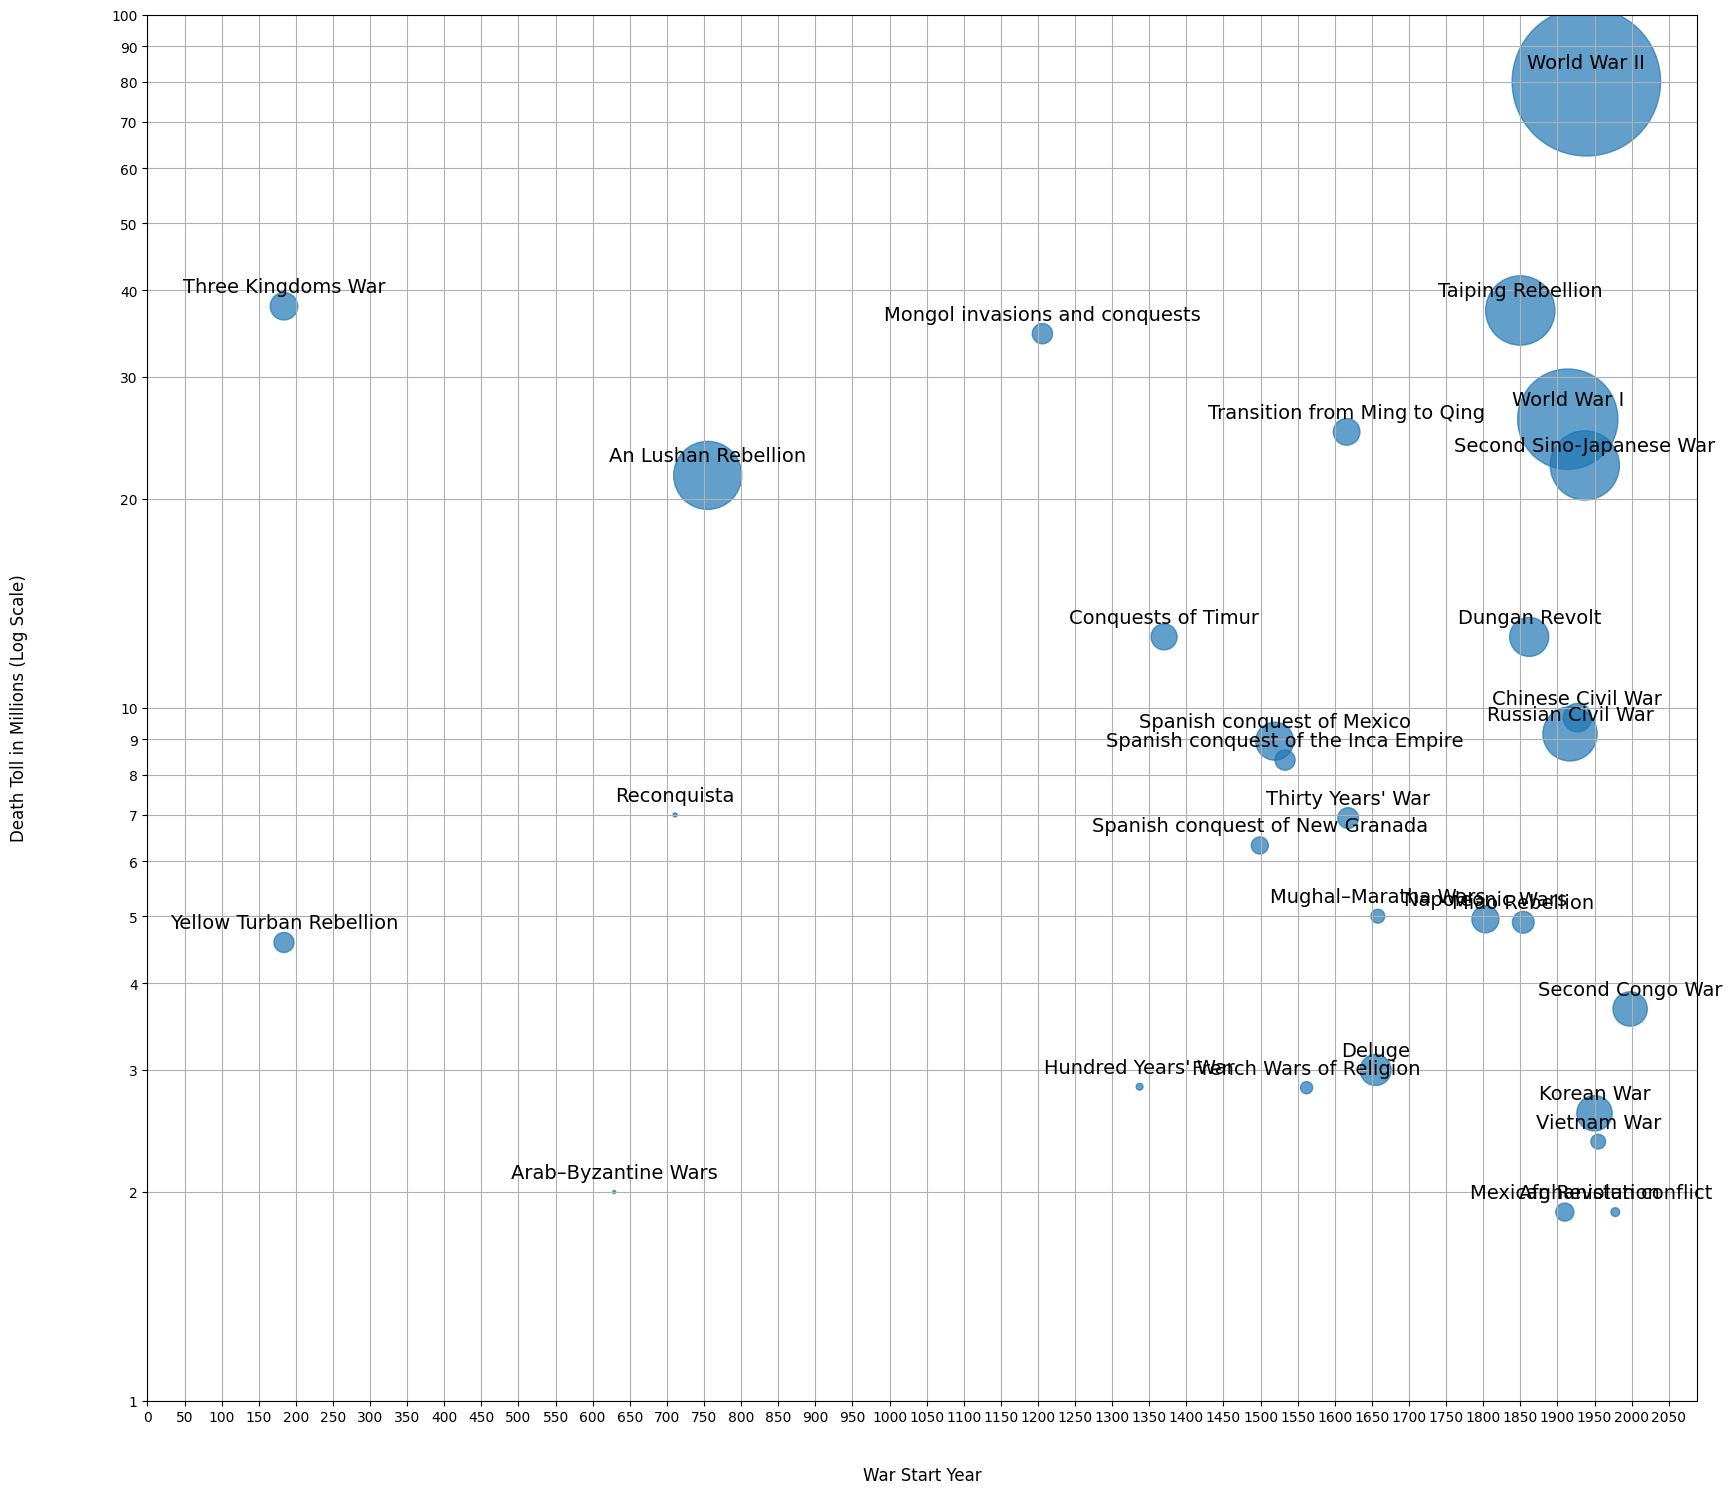

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter

# Sample data
# Assuming 'top20Deadliest' is your DataFrame containing the data

fig, ax1 = plt.subplots(figsize=(20, 18))

# Scatter plot
ax1.scatter(top30Deadliest['startDate'], top30Deadliest['geom_mean'], s=[size / 1000 for size in top30Deadliest['deathRateGM']], alpha=0.7)

for x, y, war in zip(top30Deadliest['startDate'], top30Deadliest['geom_mean'], top30Deadliest['War']):
    ax1.annotate(war, (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=14, color='black')

# Set y-axis scale to logarithmic
ax1.set_yscale('log')

# Set custom y-axis ticks for logarithmic scale
log_ticks = [1e6, 2e6,3e6,4e6, 5e6,6e6,7e6,8e6,9e6,1e7,2e7,3e7,4e7, 5e7,6e7,7e7,8e7,9e7,1e8]
ax1.yaxis.set_ticks(log_ticks)

# Set custom tick labels for logarithmic scale
# log_labels = ['1', '5', '10', '50', '100']
# ax1.yaxis.set_ticklabels(log_labels)

# Set y-axis labels format
formatter = ScalarFormatter()
formatter.set_scientific(False)
ax1.yaxis.set_major_formatter(formatter)

ax1.set_xlabel('War Start Year', labelpad=30, fontsize=12)
ax1.set_ylabel('Death Toll in Millions (Log Scale)', labelpad=60, fontsize=12)
log_labels = ['1', '2','3','4','5','6','7','8','9', '10','20','30','40','50', '60','70','80','90', '100']
ax1.yaxis.set_ticklabels(log_labels)

# Show the plot
ax1.grid(True)
plt.xticks(np.arange(0, 2070, 50))
plt.show()

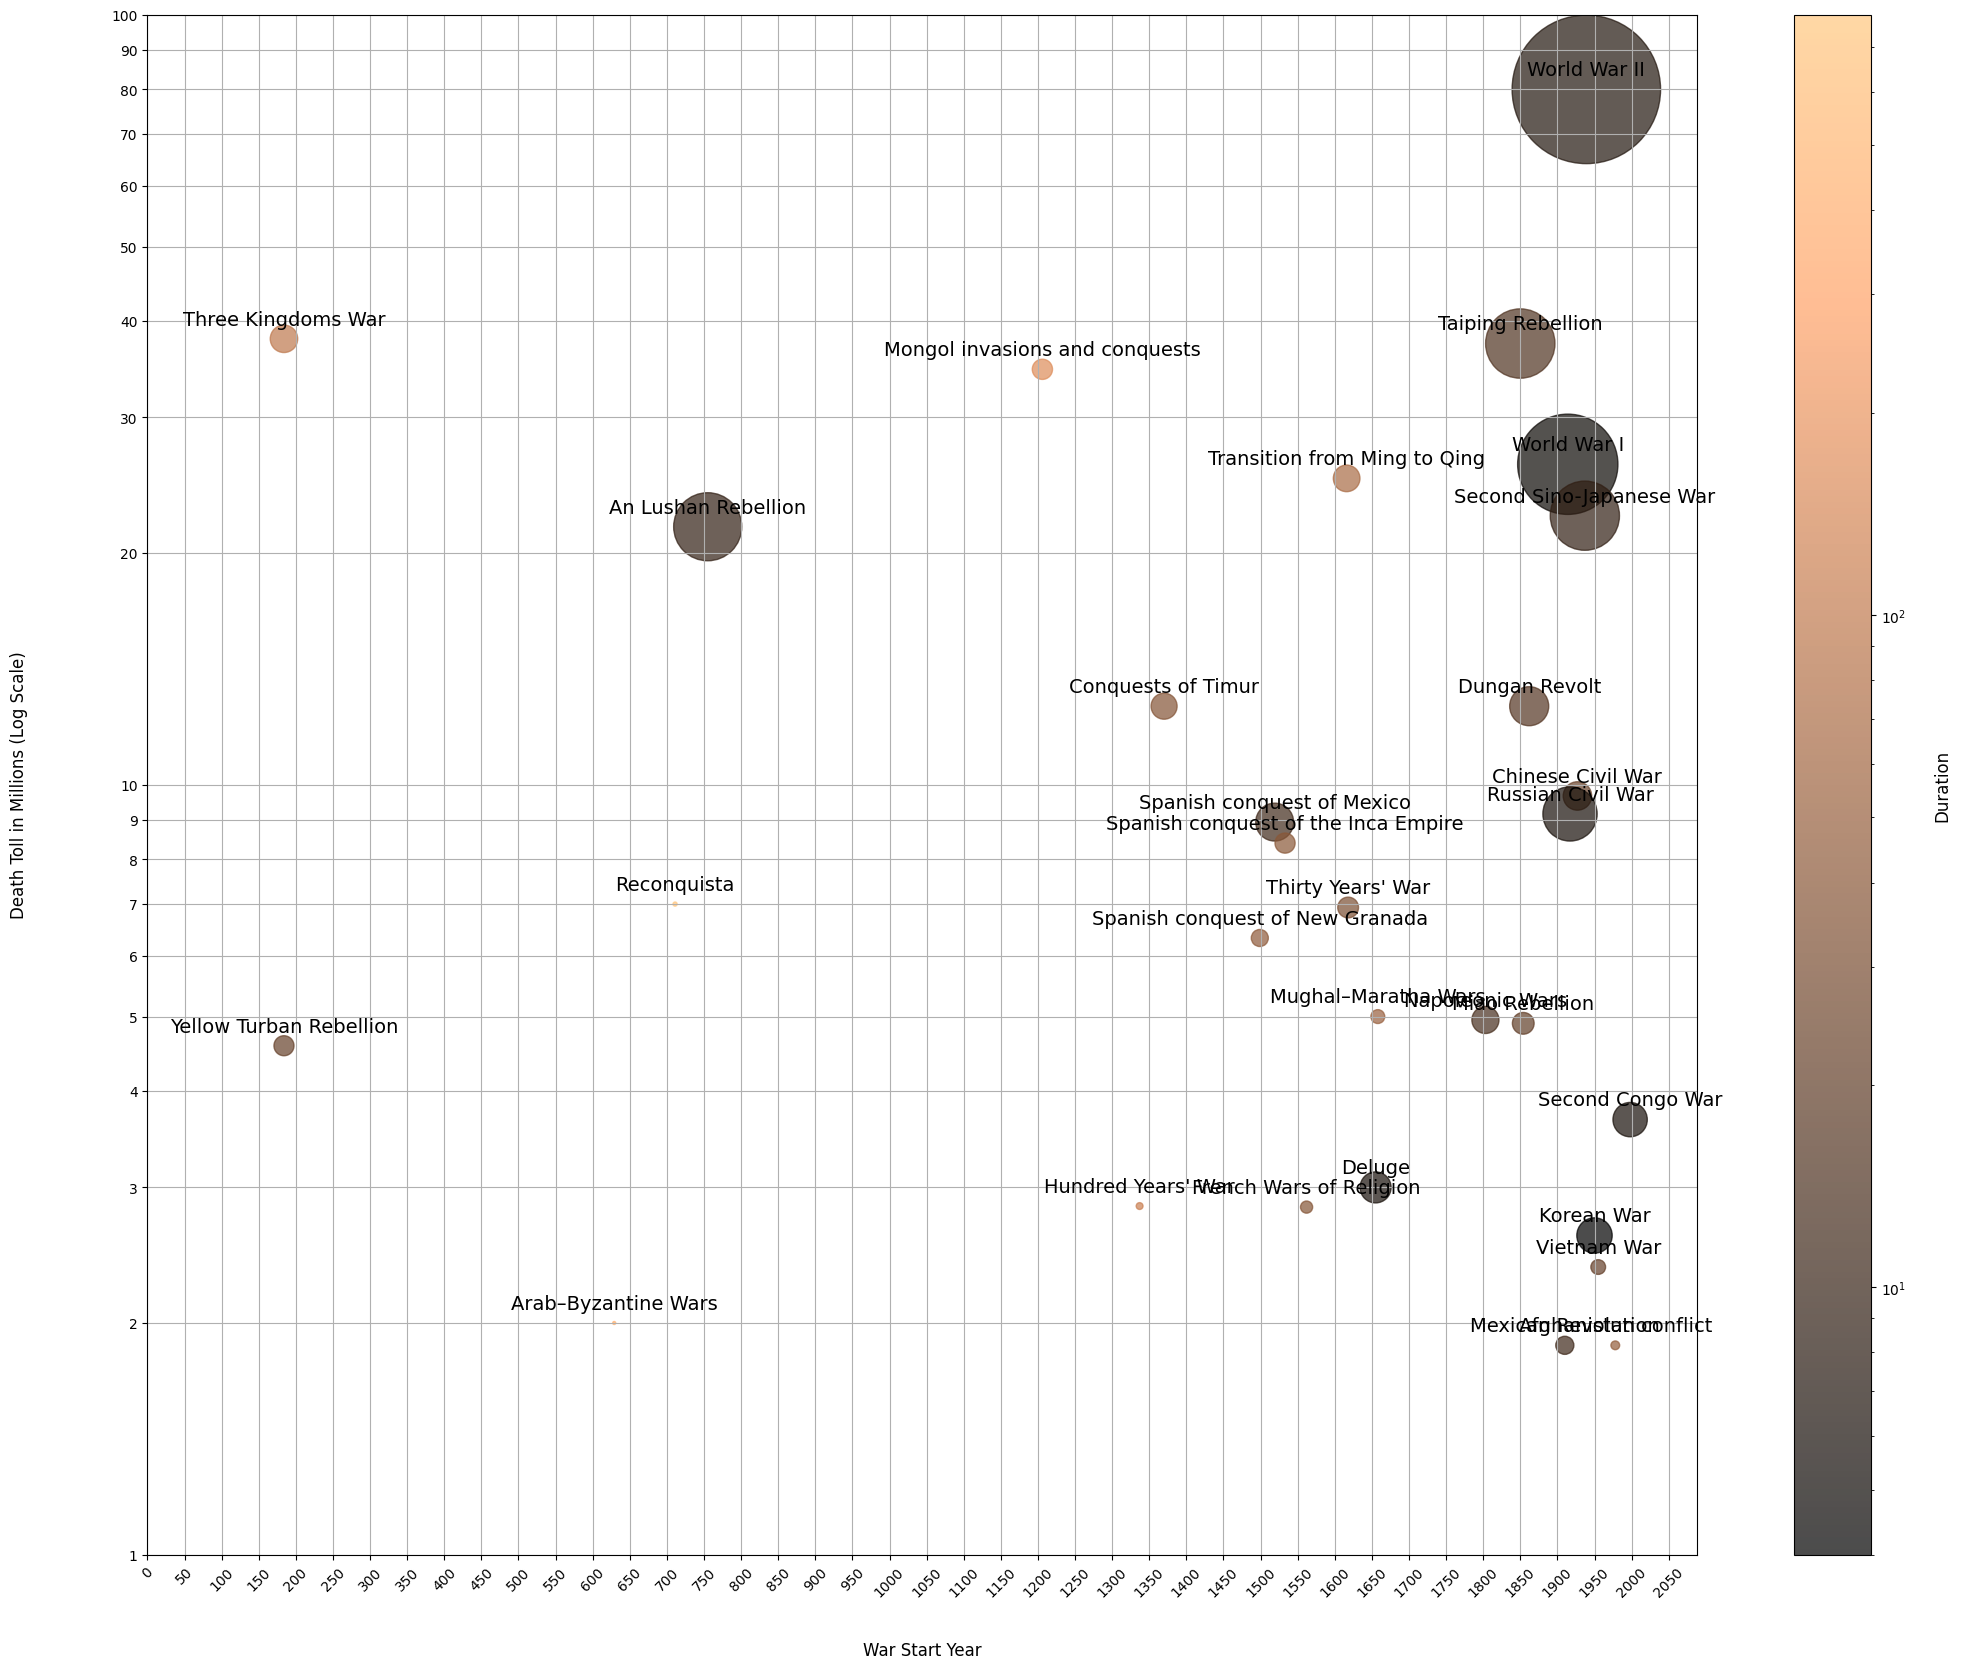

In [35]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter
from matplotlib.colors import LogNorm


# Sample data
# Assuming 'top20Deadliest' is your DataFrame containing the data

fig, ax1 = plt.subplots(figsize=(25, 20))

# Scatter plot with color-coded bubbles based on 'duration' and logarithmic scale
scatter = ax1.scatter(top30Deadliest['startDate'], top30Deadliest['geom_mean'], s=[size / 1000 for size in top30Deadliest['deathRateGM']],
                      c=top30Deadliest['duration'], cmap='copper', alpha=0.7, norm=LogNorm(vmin=top30Deadliest['duration'].min(), vmax=top30Deadliest['duration'].max()))

for x, y, war in zip(top30Deadliest['startDate'], top30Deadliest['geom_mean'], top30Deadliest['War']):
    ax1.annotate(war, (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=14, color='black')

# Set y-axis scale to logarithmic
ax1.set_yscale('log')

# Set custom y-axis ticks for logarithmic scale
log_ticks = [1e6, 2e6,3e6,4e6, 5e6,6e6,7e6,8e6,9e6,1e7,2e7,3e7,4e7, 5e7,6e7,7e7,8e7,9e7,1e8]
ax1.yaxis.set_ticks(log_ticks)

# Set y-axis labels format
formatter = ScalarFormatter()
formatter.set_scientific(False)
ax1.yaxis.set_major_formatter(formatter)

ax1.set_xlabel('War Start Year', labelpad=30, fontsize=12)
ax1.set_ylabel('Death Toll in Millions (Log Scale)', labelpad=60, fontsize=12)
log_labels = ['1', '2','3','4','5','6','7','8','9', '10','20','30','40','50', '60','70','80','90', '100']
ax1.yaxis.set_ticklabels(log_labels)

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Duration', labelpad=20, fontsize=12)

# Show the plot
ax1.grid(True)
plt.xticks(np.arange(0, 2070, 50))

# min_year = combined_df['cleanDate'].min()
# max_year = combined_df['cleanDate'].max()
# ax.set_xticks(range(0, max_year, 50)) 
# Set the angle of x-axis tick labels
plt.xticks(rotation=45)
    
plt.show()

In [36]:
#that doesn't quite work, maybe change the duration and deatgh rate....
top30Deadliest.sort_values(by = 'duration', ascending = False)

,War,BC,lowerRange,higherRange,startDate,endDate,Combatants,Location,geom_mean,aritm_mean,duration,deathRateGM,deathRateAM,Location_f,startEnd,deathsFormatted
23,Reconquista,False,7000000,7000000,711,1492,Spanish and Portuguese Christian states vs. Sp...,Iberian Peninsula,7000000.00,7000000.00,782,8951.41,8951.41,Other,(711-1492),~7.0 millions
22,Arab–Byzantine Wars,False,2000000,2000000,629,1050,Byzantine Empire and allies vs. Islamic Empire...,Middle East / North Africa / Southern Europe,2000000.00,2000000.00,422,4739.34,4739.34,Other,(629-1050),~2.0 millions
30,Mongol invasions and conquests,False,30000000,40000000,1206,1368,Mongol Empire vs. Several Eurasian states,Eurasia,34641016.15,35000000.00,163,212521.57,214723.93,Other,(1206-1368),~34.6 millions
32,Hundred Years' War,False,2300000,3500000,1337,1453,House of Valois vs. House of Plantagenet,Western Europe,2837252.19,2900000.00,117,24250.02,24786.32,Other,(1337-1453),~2.8 millions
18,Three Kingdoms War,False,36000000,40000000,184,280,Wei vs. Shu vs. Wu,China,37947331.92,38000000.00,97,391209.61,391752.58,China,(184-280),~37.9 millions
50,Transition from Ming to Qing,False,25000000,25000000,1616,1683,Qing China vs. Ming China vs. peasant rebels l...,China,25000000.00,25000000.00,68,367647.06,367647.06,China,(1616-1683),~25.0 millions
58,Mughal–Maratha Wars,False,5000000,5000000,1658,1707,Maratha empire vs. Mughal Empire,India-Bangladesh,5000000.00,5000000.00,50,100000.00,100000.00,Other,(1658-1707),~5.0 millions
158,Afghanistan conflict,False,1400000,2500000,1978,2024,see Afghanistan conflict,Afghanistan,1870828.69,1950000.00,47,39804.87,41489.36,Other,(1978-2024),~1.9 millions
37,Spanish conquest of New Granada,False,5000000,8000000,1499,1540,Spanish Empire vs. Colombian civilizations,Colombia,6324555.32,6500000.00,42,150584.65,154761.90,Other,(1499-1540),~6.3 millions
41,Spanish conquest of the Inca Empire,False,8400000,8400000,1533,1572,Spanish Empire vs. Inca Empire,Peru,8400000.00,8400000.00,40,210000.00,210000.00,Other,(1533-1572),~8.4 millions


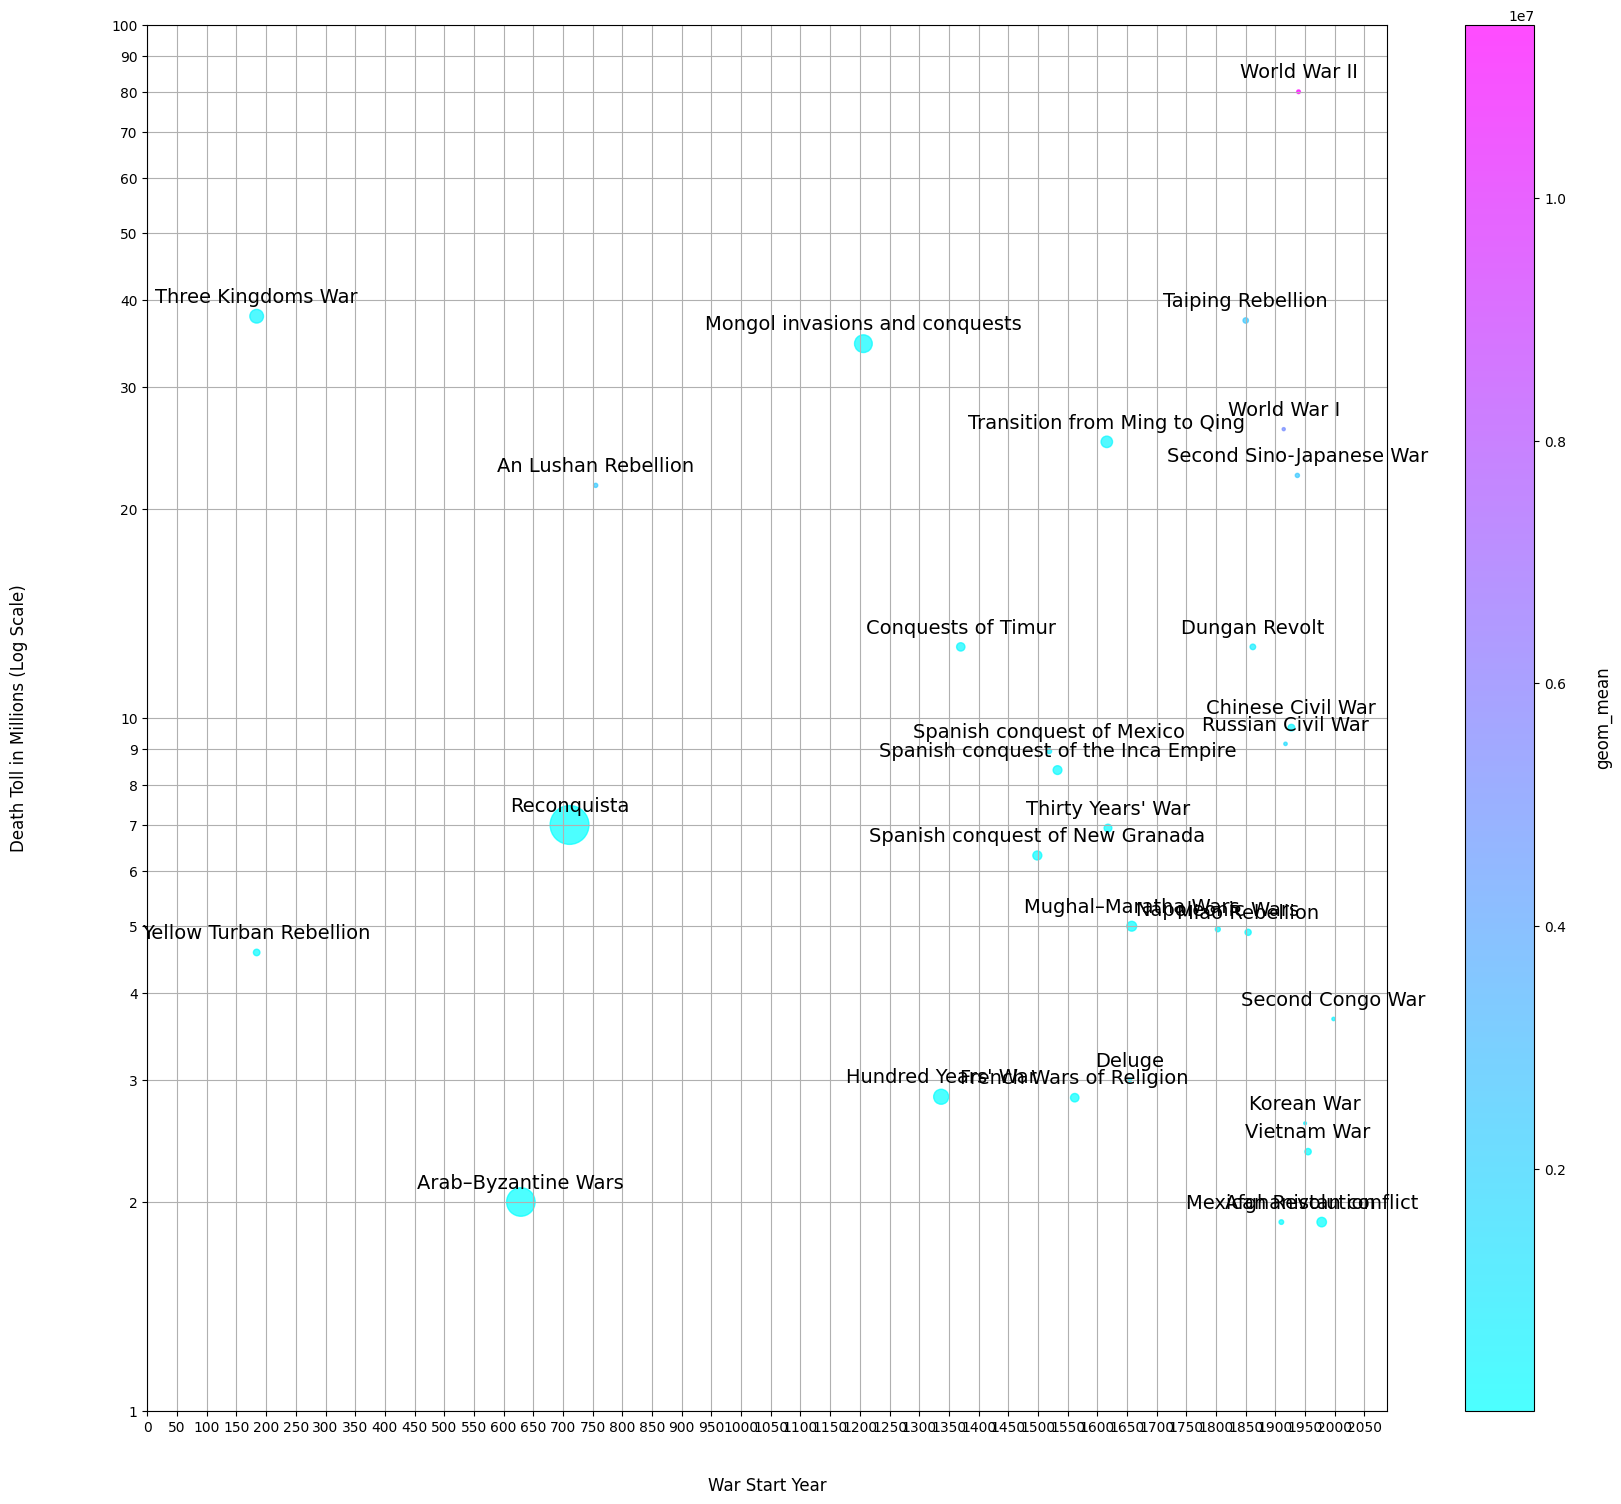

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter

# Sample data
# Assuming 'top20Deadliest' is your DataFrame containing the data

fig, ax1 = plt.subplots(figsize=(20, 18))

# Scatter plot with color-coded bubbles based on 'duration'
scatter = ax1.scatter(top30Deadliest['startDate'], top30Deadliest['geom_mean'], s=[size for size in top30Deadliest['duration']],
                      c=top30Deadliest['deathRateGM'], cmap='cool', alpha=0.7)

for x, y, war in zip(top30Deadliest['startDate'], top30Deadliest['geom_mean'], top30Deadliest['War']):
    ax1.annotate(war, (x, y), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=14, color='black')

# Set y-axis scale to logarithmic
ax1.set_yscale('log')

# Set custom y-axis ticks for logarithmic scale
log_ticks = [1e6, 2e6,3e6,4e6, 5e6,6e6,7e6,8e6,9e6,1e7,2e7,3e7,4e7, 5e7,6e7,7e7,8e7,9e7,1e8]
ax1.yaxis.set_ticks(log_ticks)

# Set y-axis labels format
formatter = ScalarFormatter()
formatter.set_scientific(False)
ax1.yaxis.set_major_formatter(formatter)

ax1.set_xlabel('War Start Year', labelpad=30, fontsize=12)
ax1.set_ylabel('Death Toll in Millions (Log Scale)', labelpad=60, fontsize=12)
log_labels = ['1', '2','3','4','5','6','7','8','9', '10','20','30','40','50', '60','70','80','90', '100']
ax1.yaxis.set_ticklabels(log_labels)

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('geom_mean', labelpad=20, fontsize=12)

# Show the plot
ax1.grid(True)
plt.xticks(np.arange(0, 2070, 50))
plt.show()

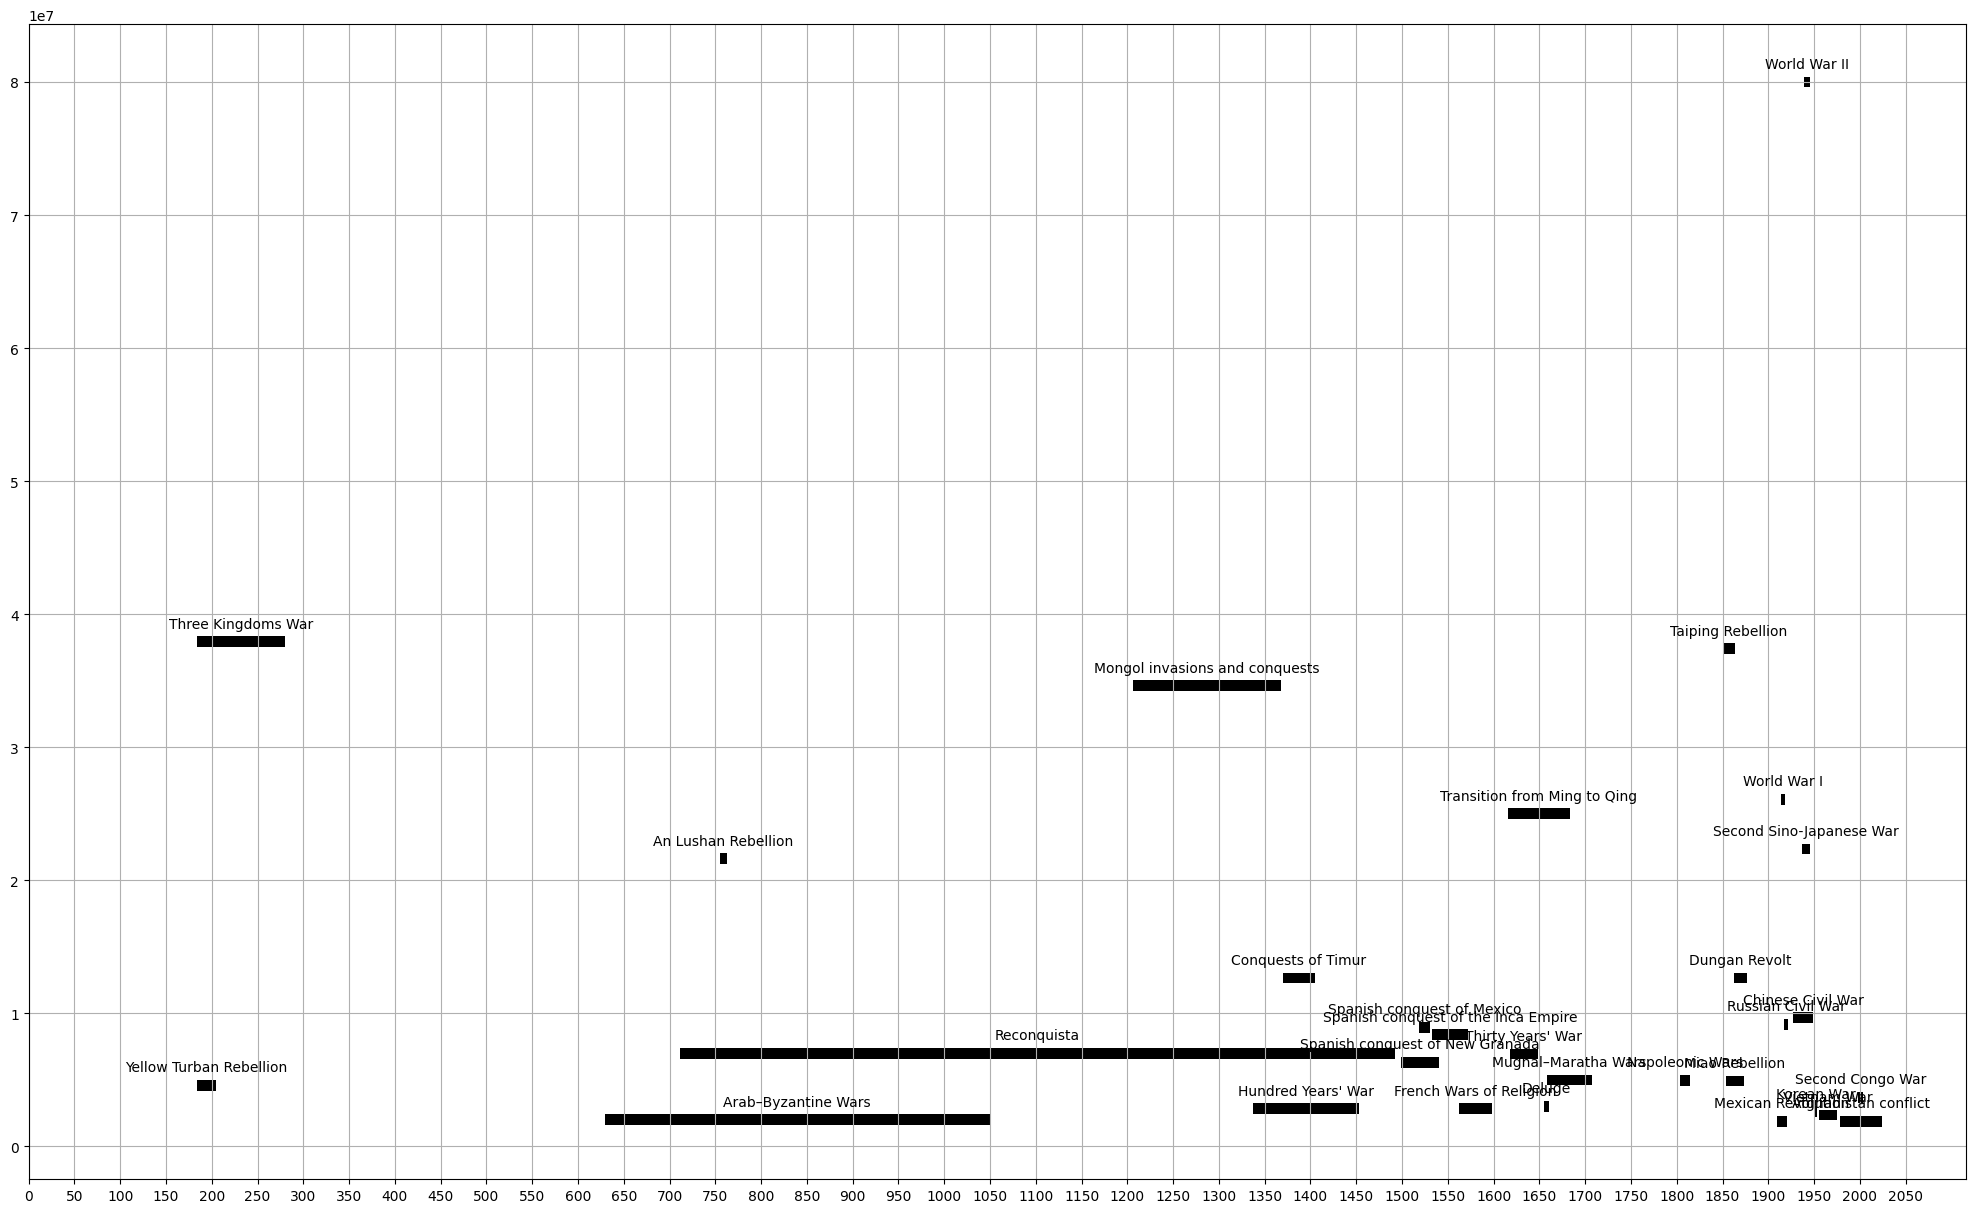

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter
from matplotlib.colors import Normalize

# Sample data
# Assuming 'top30Deadliest' is your DataFrame containing the data

fig, ax1 = plt.subplots(figsize=(25, 15))


bars = ax1.barh(top30Deadliest['geom_mean'], top30Deadliest['endDate'] - top30Deadliest['startDate'], left=top30Deadliest['startDate'], color = 'black', height=800000, )


#Add annotations
for start, end, geom_mean, war in zip(top30Deadliest['startDate'], top30Deadliest['endDate'], top30Deadliest['geom_mean'], top30Deadliest['War']):
    # Calculate the x-coordinate for the annotation (midpoint of the bar)
    x = (start + end) / 2
    # Add the annotation
    ax1.annotate(war, xy=(x, geom_mean), xytext=(0, 10), textcoords="offset points", ha='center', fontsize=10, color='black')

# Show the plot
ax1.grid(True)
plt.xticks(np.arange(0, 2070, 50))
plt.show()

In [39]:
#top30Deadliest =cedf.sort_values(by = 'geom_mean', ascending = False).head(30)


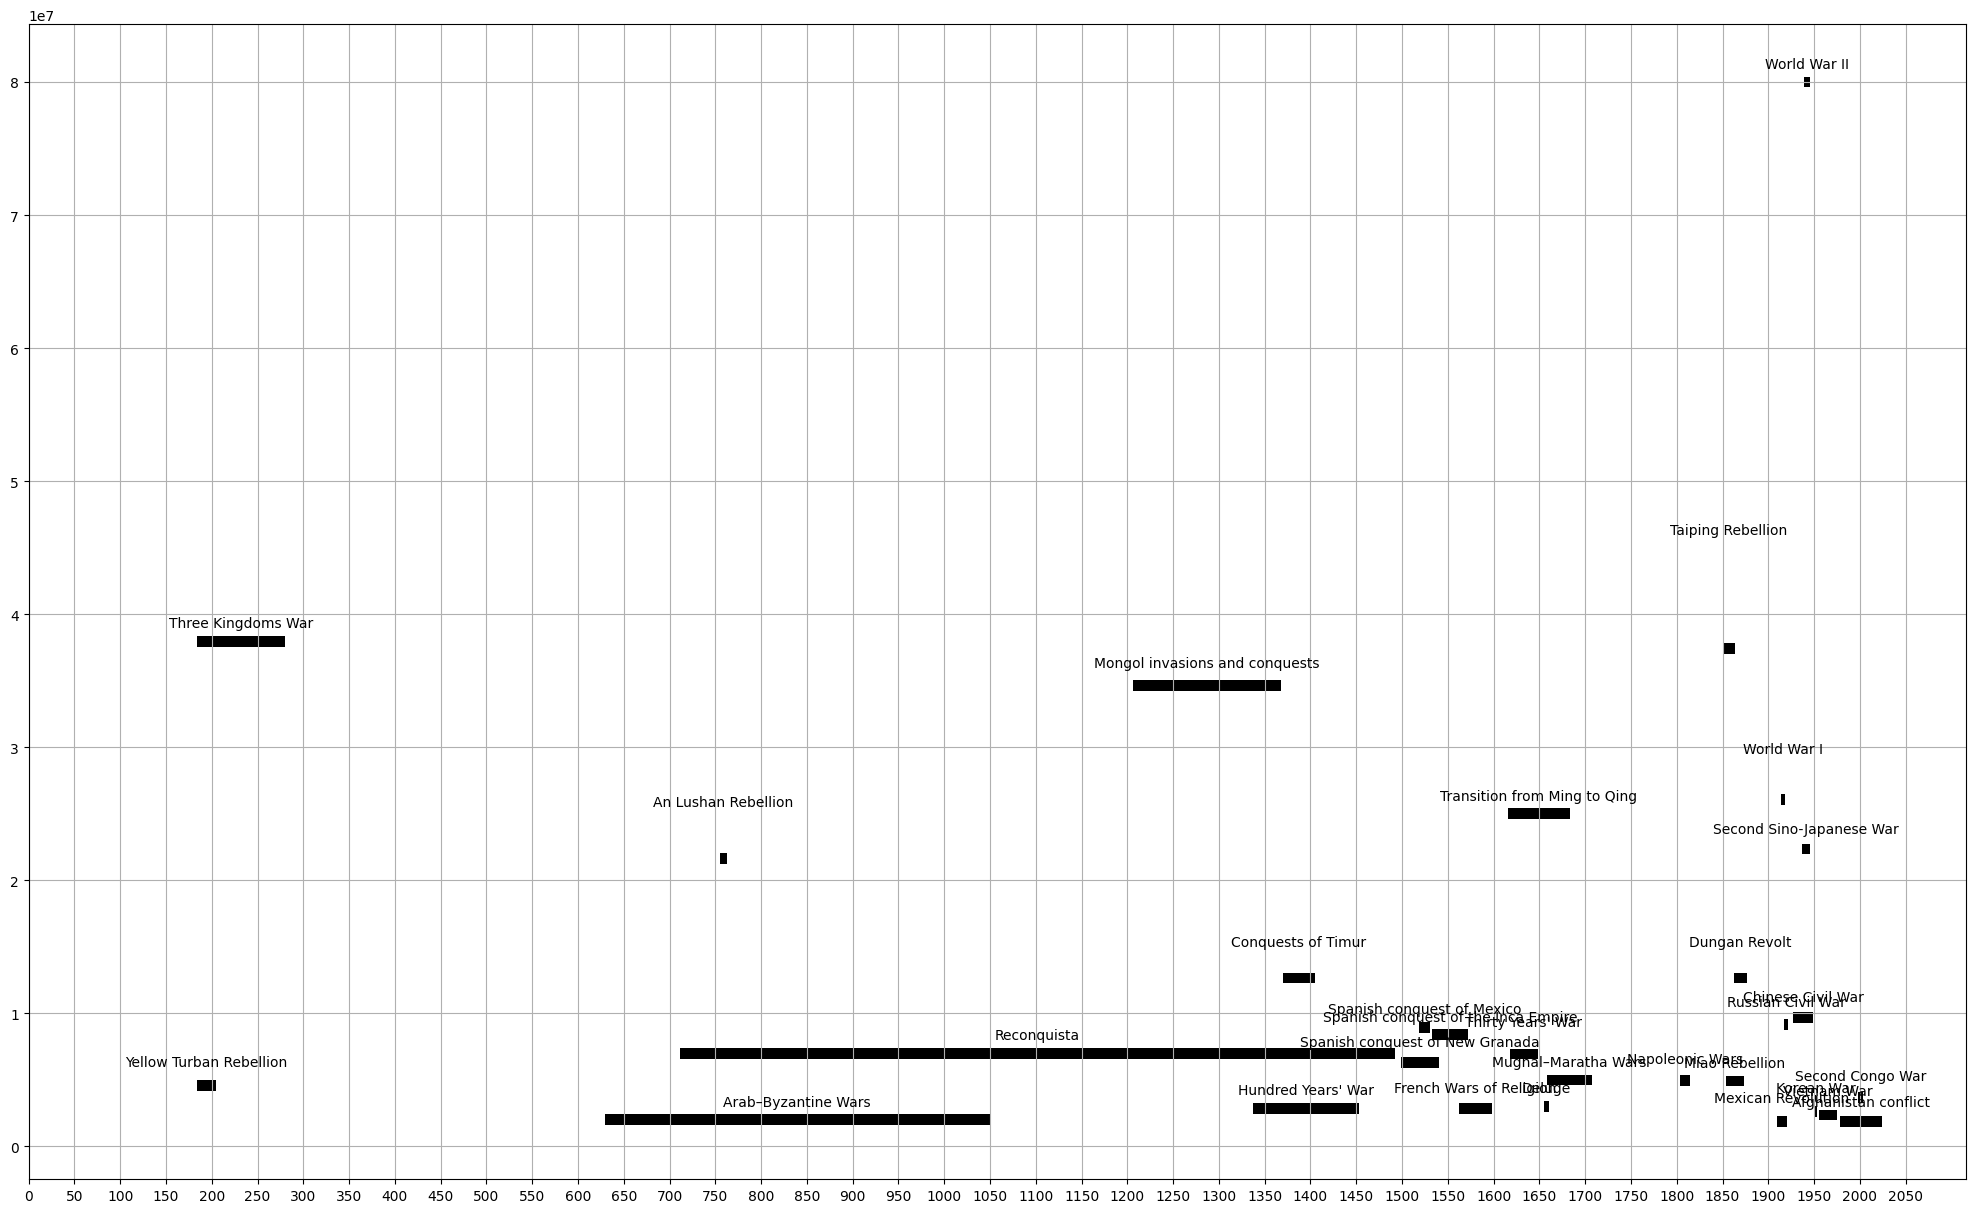

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter
from matplotlib.colors import Normalize

# Sample data
# Assuming 'top30Deadliest' is your DataFrame containing the data

fig, ax1 = plt.subplots(figsize=(25, 15))


bars = ax1.barh(top30Deadliest['geom_mean'], top30Deadliest['endDate'] - top30Deadliest['startDate'], left=top30Deadliest['startDate'], color = 'black', height=800000, )


#Add annotations
for start, end, geom_mean, war in zip(top30Deadliest['startDate'], top30Deadliest['endDate'], top30Deadliest['aritm_mean'], top30Deadliest['War']):
    # Calculate the x-coordinate for the annotation (midpoint of the bar)
    x = (start + end) / 2
    # Add the annotation
    ax1.annotate(war, xy=(x, geom_mean), xytext=(0, 10), textcoords="offset points", ha='center', fontsize=10, color='black')

# Show the plot
ax1.grid(True)
plt.xticks(np.arange(0, 2070, 50))
plt.show()

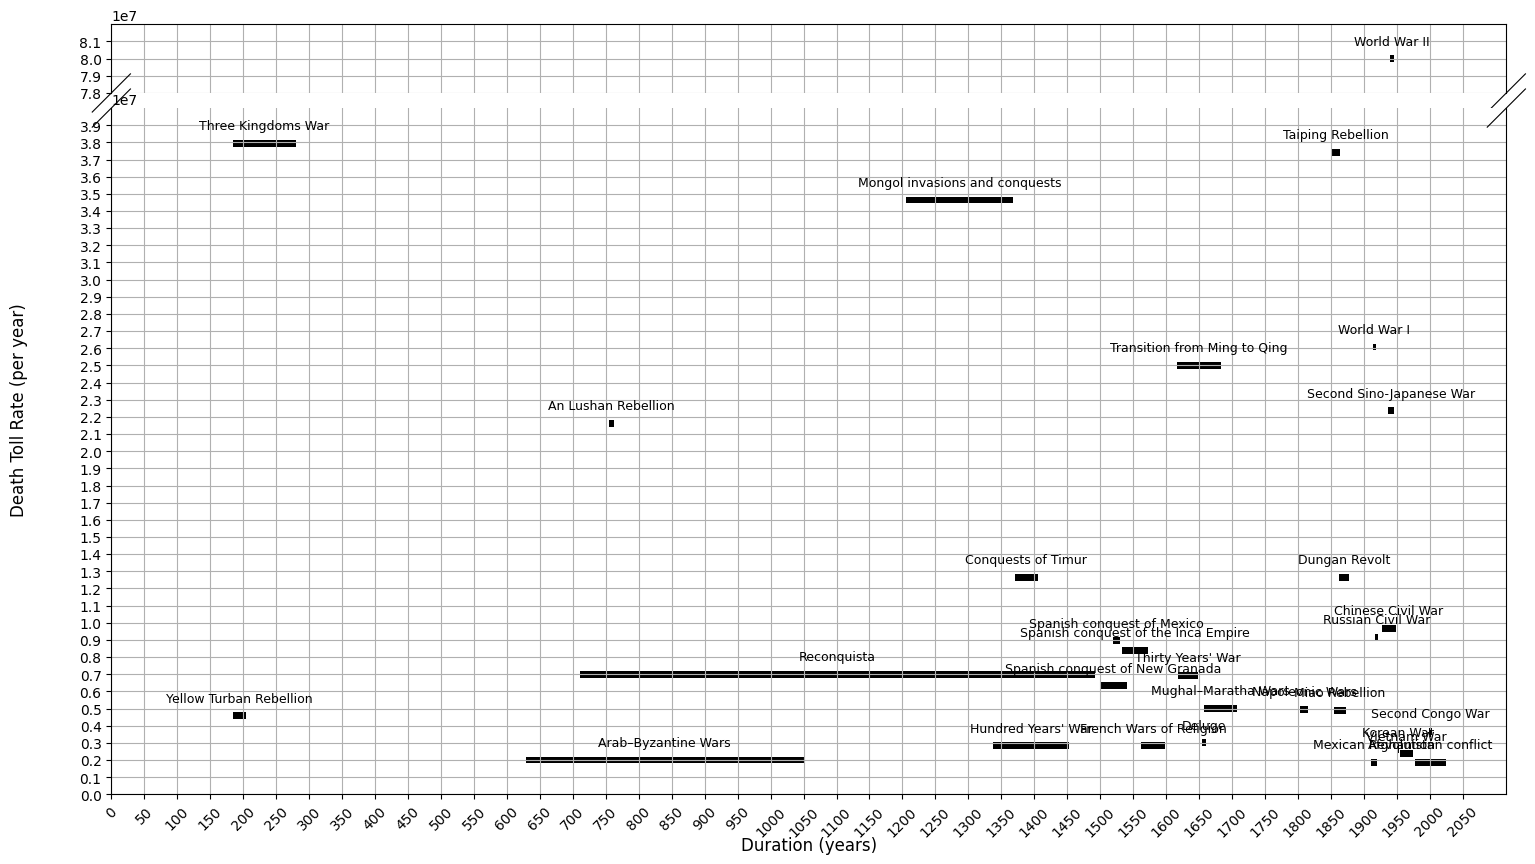

In [41]:
import locale
from brokenaxes import brokenaxes
import matplotlib.pyplot as plt
import numpy as np

# Set the locale to use commas as thousands separators
locale.setlocale(locale.LC_ALL, '')

# Sample data
# top20Deadliest is assumed to be your DataFrame containing the data

plt.figure(figsize=(18, 10))

# Create a brokenaxes instance within the figure
bax = brokenaxes(
    ylims=((0, 40000000),(78000000, 82000000)),
    hspace=.04,
    despine=False
)

# Scatter plot
bax.barh(top30Deadliest['geom_mean'], top30Deadliest['endDate'] - top30Deadliest['startDate'], left=top30Deadliest['startDate'], color = 'black', height=400000, )

#Add annotations
for start, end, geom_mean, war in zip(top30Deadliest['startDate'], top30Deadliest['endDate'], top30Deadliest['geom_mean'], top30Deadliest['War']):
    # Calculate the x-coordinate for the annotation (midpoint of the bar)
    x = (start + end) / 2
    # Add the annotation
    bax.annotate(war, xy=(x, geom_mean), xytext=(0, 10), textcoords="offset points", ha='center', fontsize=9, color='black')

    

# Set custom y-axis tick labels for each axis with thousands separators
# for ax in bax.axs:
#     ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: locale.format_string('%d', x, grouping=True)))


bax.axs[0].yaxis.set_ticks(np.arange(78000000, 82000000, 1000000))
bax.axs[1].yaxis.set_ticks(np.arange(0,40000000, 1000000)) 
#bax.set_title('Top 20 Most Intense Wars in History')
bax.set_xlabel('Duration (years)', labelpad=30, fontsize=12)
bax.set_ylabel('Death Toll Rate (per year)', labelpad=60, fontsize=12)

for ax in bax.axs:
    ax.grid(which='major', axis='both')
    ax.xaxis.set_ticks(np.arange(0, 2070, 50))
    ax.xaxis.set_tick_params(labelsize=10, rotation=45)#ax.xticks(rotation=45)



plt.show()

C:\Users\karol\AppData\Local\Temp\ipykernel_40056\1194257762.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(top30Deadliest['Location'].unique()))


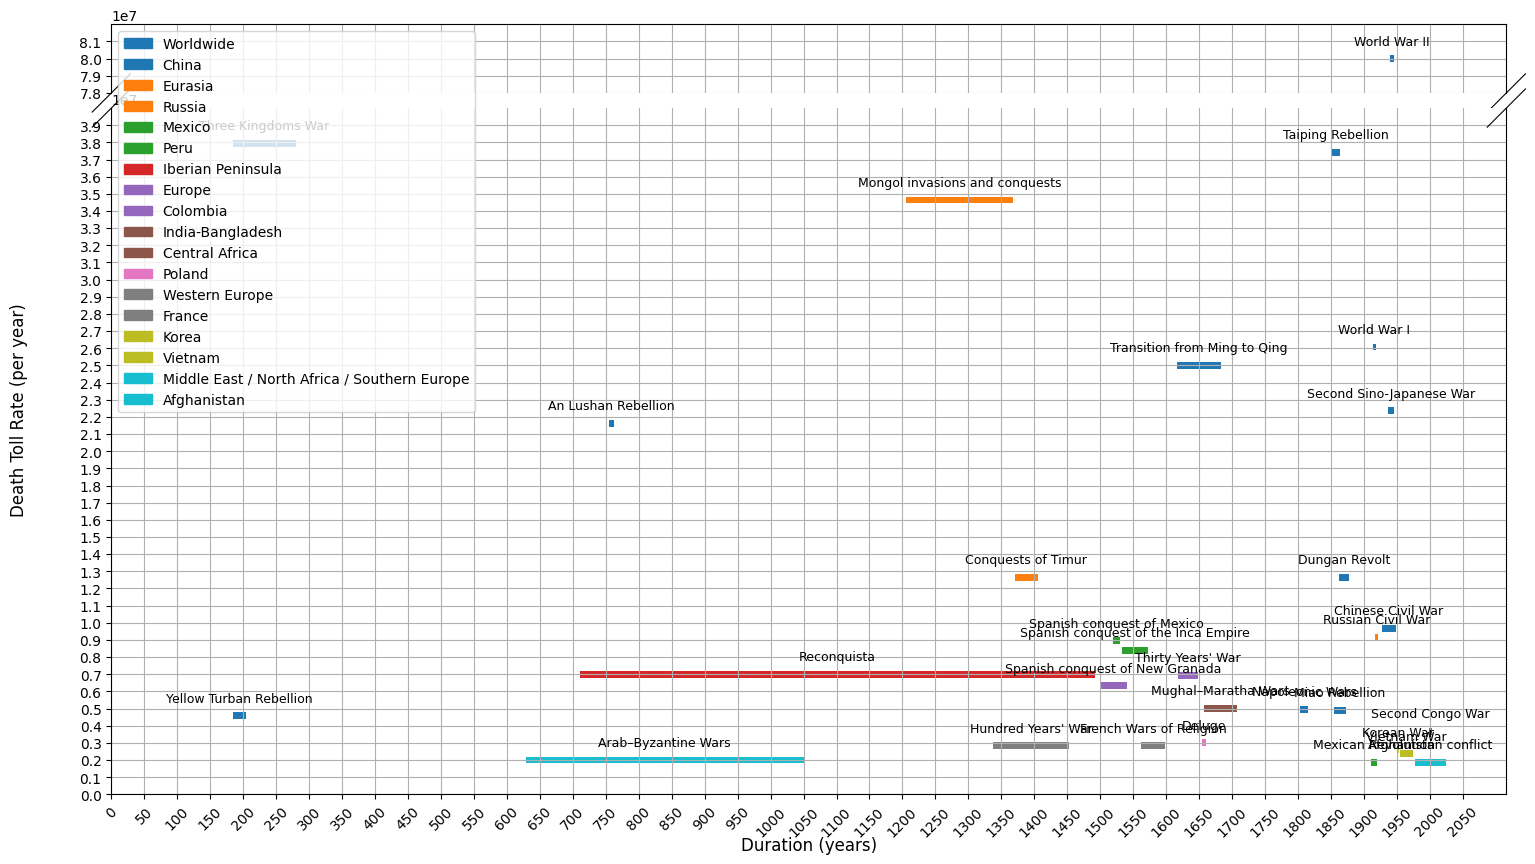

In [42]:
import locale
from brokenaxes import brokenaxes
import matplotlib.pyplot as plt
import numpy as np

# Set the locale to use commas as thousands separators
locale.setlocale(locale.LC_ALL, '')

# Sample data
# Assuming 'top30Deadliest' is your DataFrame containing the data

plt.figure(figsize=(18, 10))

# Create a colormap
colors = plt.cm.get_cmap('tab10', len(top30Deadliest['Location'].unique()))

# Create a brokenaxes instance within the figure
bax = brokenaxes(
    ylims=((0, 40000000),(78000000, 82000000)),
    hspace=.04,
    despine=False
)

# Scatter plot with color-coded bars based on 'Location'
locations = top30Deadliest['Location']
legend_labels = []
for i, (start, end, geom_mean, location) in enumerate(zip(top30Deadliest['startDate'], top30Deadliest['endDate'], top30Deadliest['geom_mean'], locations)):
    x = (start + end) / 2
    color_index = list(top30Deadliest['Location'].unique()).index(location)  # Get the index of the location
    color = colors(color_index)  # Assign color based on index
    bax.barh(geom_mean, end - start, left=start, color=color, height=400000)
    
    # Add annotation
    war = top30Deadliest['War'].iloc[i]  # Access 'War' using iloc to avoid KeyError
    bax.annotate(war, xy=(x, geom_mean), xytext=(0, 10), textcoords="offset points",
                 ha='center', fontsize=9, color='black')
    
    # Collect legend labels
    if location not in legend_labels:
        legend_labels.append(location)

# Set custom y-axis tick labels for each axis with thousands separators
bax.axs[0].yaxis.set_ticks(np.arange(78000000, 82000000, 1000000))
bax.axs[1].yaxis.set_ticks(np.arange(0,40000000, 1000000)) 

bax.set_xlabel('Duration (years)', labelpad=30, fontsize=12)
bax.set_ylabel('Death Toll Rate (per year)', labelpad=60, fontsize=12)

# Customize ticks and grid
for ax in bax.axs:
    ax.grid(which='major', axis='both')
    ax.xaxis.set_ticks(np.arange(0, 2070, 50))
    ax.xaxis.set_tick_params(labelsize=10, rotation=45)

# Create legend
legend_handles = [plt.Rectangle((0,0),1,1, color=colors(i)) for i in range(len(legend_labels))]
plt.legend(legend_handles, legend_labels, loc='upper left')

plt.show()

C:\Users\karol\AppData\Local\Temp\ipykernel_40056\3548727615.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20b', len(top30Deadliest['Location'].unique()))


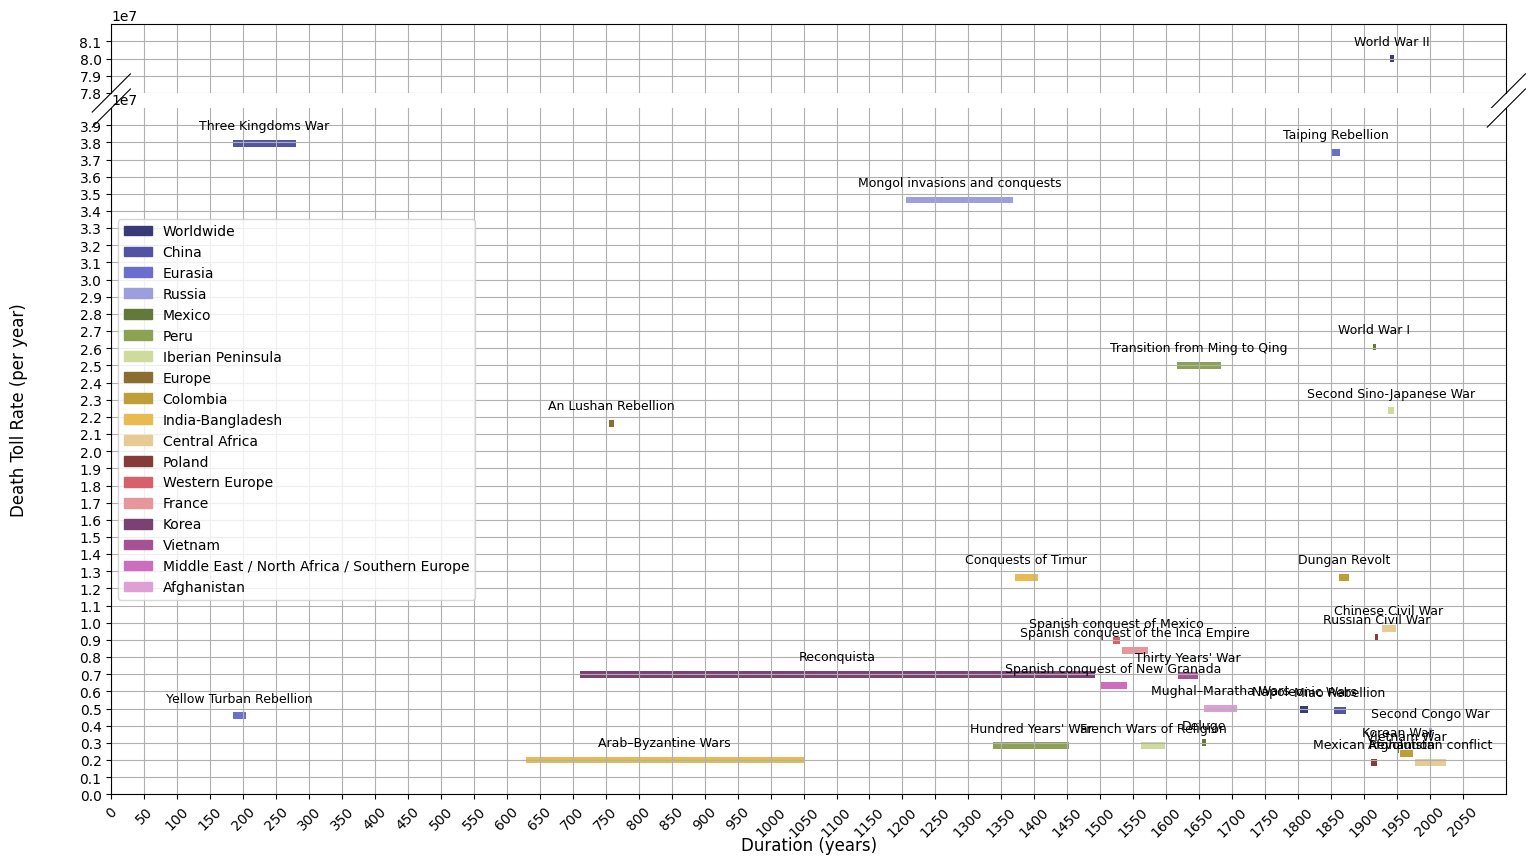

In [43]:
import locale
from brokenaxes import brokenaxes
import matplotlib.pyplot as plt
import numpy as np

# Set the locale to use commas as thousands separators
locale.setlocale(locale.LC_ALL, '')

# Sample data
# Assuming 'top30Deadliest' is your DataFrame containing the data

plt.figure(figsize=(18, 10))

# Create a colormap
colors = plt.cm.get_cmap('tab20b', len(top30Deadliest['Location'].unique()))

# Create a brokenaxes instance within the figure
bax = brokenaxes(
    ylims=((0, 40000000),(78000000, 82000000)),
    hspace=.04,
    despine=False
)

# Scatter plot with color-coded bars based on 'Location'
locations = top30Deadliest['Location']
num_locations = len(locations.unique())
legend_labels = []
for i, (start, end, geom_mean, location) in enumerate(zip(top30Deadliest['startDate'], top30Deadliest['endDate'], top30Deadliest['geom_mean'], locations)):
    x = (start + end) / 2
    color = colors(i % num_locations)  # Cycle through colors for each location
    bax.barh(geom_mean, end - start, left=start, color=color, height=400000)
    
    # Add annotation
    war = top30Deadliest['War'].iloc[i]  # Access 'War' using iloc to avoid KeyError
    bax.annotate(war, xy=(x, geom_mean), xytext=(0, 10), textcoords="offset points",
                 ha='center', fontsize=9, color='black')
    
    # Collect legend labels
    if location not in legend_labels:
        legend_labels.append(location)

# Set custom y-axis tick labels for each axis with thousands separators
bax.axs[0].yaxis.set_ticks(np.arange(78000000, 82000000, 1000000))
bax.axs[1].yaxis.set_ticks(np.arange(0,40000000, 1000000)) 

bax.set_xlabel('Duration (years)', labelpad=30, fontsize=12)
bax.set_ylabel('Death Toll Rate (per year)', labelpad=60, fontsize=12)

# Customize ticks and grid
for ax in bax.axs:
    ax.grid(which='major', axis='both')
    ax.xaxis.set_ticks(np.arange(0, 2070, 50))
    ax.xaxis.set_tick_params(labelsize=10, rotation=45)

# Create legend
legend_handles = [plt.Rectangle((0,0),1,1, color=colors(i % num_locations)) for i in range(len(legend_labels))]
plt.legend(legend_handles, legend_labels, loc='center left')

plt.show()

C:\Users\karol\AppData\Local\Temp\ipykernel_40056\1298819597.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set1', len(top30Deadliest['Location'].unique()))


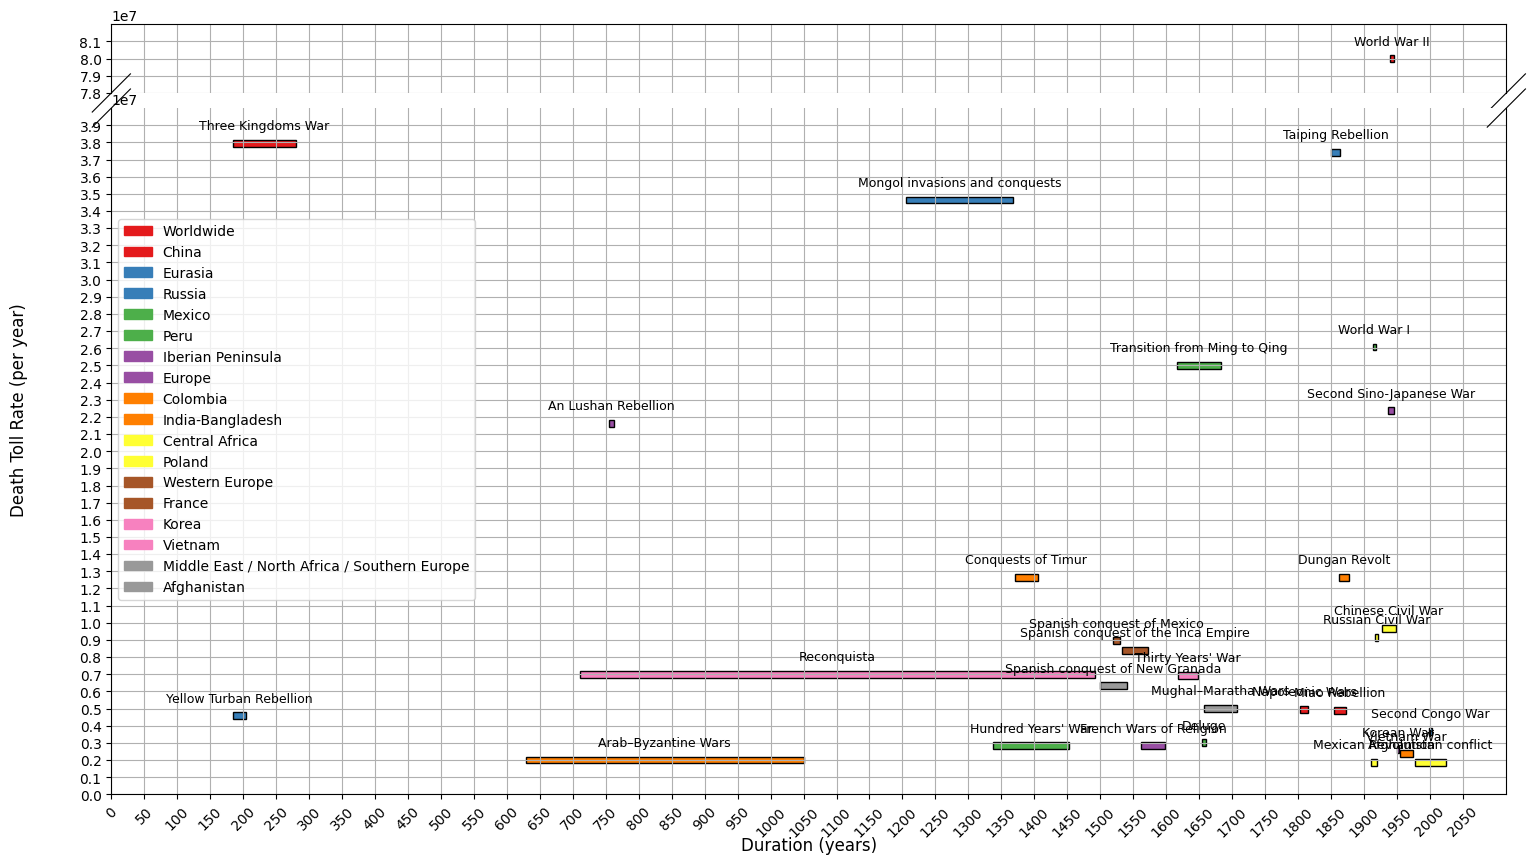

In [44]:
import locale
from brokenaxes import brokenaxes
import matplotlib.pyplot as plt
import numpy as np

# Set the locale to use commas as thousands separators
locale.setlocale(locale.LC_ALL, '')

# Sample data
# Assuming 'top30Deadliest' is your DataFrame containing the data

plt.figure(figsize=(18, 10))

# Create a colormap
colors = plt.cm.get_cmap('Set1', len(top30Deadliest['Location'].unique()))

# Create a brokenaxes instance within the figure
bax = brokenaxes(
    ylims=((0, 40000000),(78000000, 82000000)),
    hspace=.04,
    despine=False
)

# Scatter plot with color-coded bars based on 'Location'
locations = top30Deadliest['Location']
num_locations = len(locations.unique())
legend_labels = []
for i, (start, end, geom_mean, location) in enumerate(zip(top30Deadliest['startDate'], top30Deadliest['endDate'], top30Deadliest['geom_mean'], locations)):
    x = (start + end) / 2
    color = colors(i % num_locations)  # Cycle through colors for each location
    bax.barh(geom_mean, end - start, left=start, color=color, edgecolor='black', height=400000)
    
    # Add annotation
    war = top30Deadliest['War'].iloc[i]  # Access 'War' using iloc to avoid KeyError
    bax.annotate(war, xy=(x, geom_mean), xytext=(0, 10), textcoords="offset points",
                 ha='center', fontsize=9, color='black')
    
    # Collect legend labels
    if location not in legend_labels:
        legend_labels.append(location)

# Set custom y-axis tick labels for each axis with thousands separators
bax.axs[0].yaxis.set_ticks(np.arange(78000000, 82000000, 1000000))
bax.axs[1].yaxis.set_ticks(np.arange(0,40000000, 1000000)) 

bax.set_xlabel('Duration (years)', labelpad=30, fontsize=12)
bax.set_ylabel('Death Toll Rate (per year)', labelpad=60, fontsize=12)

# Customize ticks and grid
for ax in bax.axs:
    ax.grid(which='major', axis='both')
    ax.xaxis.set_ticks(np.arange(0, 2070, 50))
    ax.xaxis.set_tick_params(labelsize=10, rotation=45)

# Create legend
legend_handles = [plt.Rectangle((0,0),1,1, color=colors(i % num_locations)) for i in range(len(legend_labels))]
plt.legend(legend_handles, legend_labels, loc='center left')

plt.show()

In [45]:
top30Deadliest

,War,BC,lowerRange,higherRange,startDate,endDate,Combatants,Location,geom_mean,aritm_mean,duration,deathRateGM,deathRateAM,Location_f,startEnd,deathsFormatted
123,World War II,False,80000000,80000000,1939,1945,Allied powers vs. Axis Powers,Worldwide,80000000.00,80000000.00,7,11428571.43,11428571.43,Worldwide,(1939-1945),~80.0 millions
18,Three Kingdoms War,False,36000000,40000000,184,280,Wei vs. Shu vs. Wu,China,37947331.92,38000000.00,97,391209.61,391752.58,China,(184-280),~37.9 millions
84,Taiping Rebellion,False,20000000,70000000,1850,1864,Qing China vs. Taiping Heavenly Kingdom,China,37416573.87,45000000.00,15,2494438.26,3000000.00,China,(1850-1864),~37.4 millions
30,Mongol invasions and conquests,False,30000000,40000000,1206,1368,Mongol Empire vs. Several Eurasian states,Eurasia,34641016.15,35000000.00,163,212521.57,214723.93,Other,(1206-1368),~34.6 millions
111,World War I,False,17000000,40000000,1914,1918,Allied Powers vs. Central Powers,Worldwide,26076809.62,28500000.00,5,5215361.92,5700000.00,Worldwide,(1914-1918),~26.1 millions
50,Transition from Ming to Qing,False,25000000,25000000,1616,1683,Qing China vs. Ming China vs. peasant rebels l...,China,25000000.00,25000000.00,68,367647.06,367647.06,China,(1616-1683),~25.0 millions
122,Second Sino-Japanese War,False,20000000,25000000,1937,1945,Republic of China and allies vs. Japan,China,22360679.77,22500000.00,9,2484519.97,2500000.00,China,(1937-1945),~22.4 millions
25,An Lushan Rebellion,False,13000000,36000000,755,763,Tang dynasty China and Islamic Empire vs. Yan ...,China,21633307.65,24500000.00,9,2403700.85,2722222.22,China,(755-763),~21.6 millions
92,Dungan Revolt,False,8000000,20000000,1862,1877,Qing China vs. Hui vs. Kashgaria,China,12649110.64,14000000.00,16,790569.42,875000.00,China,(1862-1877),~12.6 millions
33,Conquests of Timur,False,8000000,20000000,1370,1405,Timurid Empire vs. several middle eastern states,Eurasia,12649110.64,14000000.00,36,351364.18,388888.89,Other,(1370-1405),~12.6 millions


C:\Users\karol\AppData\Local\Temp\ipykernel_40056\2450184553.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20')


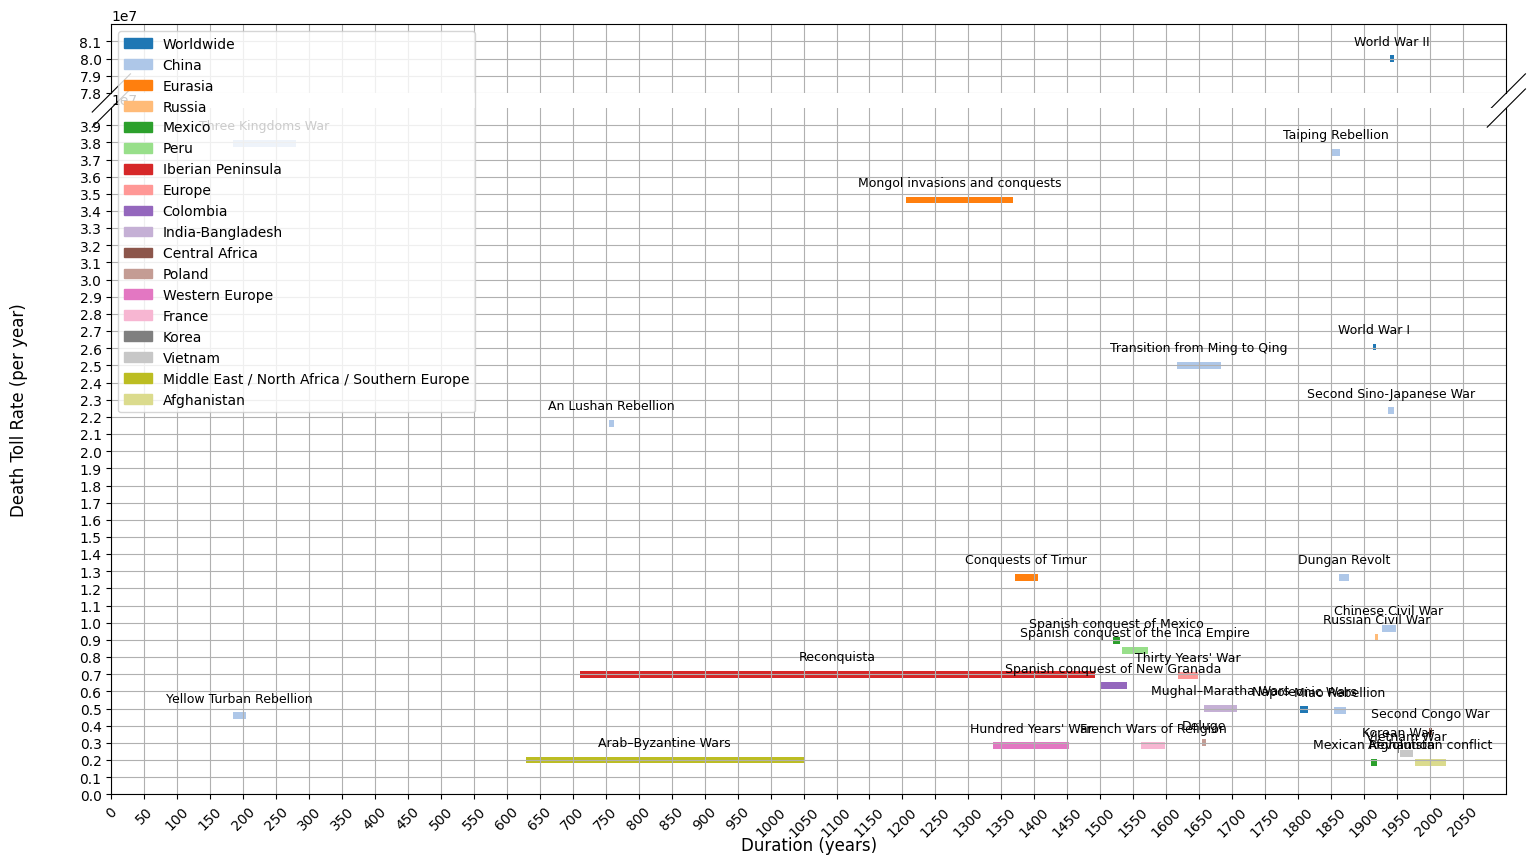

In [46]:
import locale
from brokenaxes import brokenaxes
import matplotlib.pyplot as plt
import numpy as np

# Set the locale to use commas as thousands separators
locale.setlocale(locale.LC_ALL, '')

# Sample data
# Assuming 'top30Deadliest' is your DataFrame containing the data

plt.figure(figsize=(18, 10))

# Create a colormap
colors = plt.cm.get_cmap('tab20')

# Create a dictionary to map each unique location to a color
unique_locations = top30Deadliest['Location'].unique()
location_colors = {loc: colors(i % len(unique_locations)) for i, loc in enumerate(unique_locations)}

# Create a brokenaxes instance within the figure
bax = brokenaxes(
    ylims=((0, 40000000),(78000000, 82000000)),
    hspace=.04,
    despine=False
)

# Scatter plot with color-coded bars based on 'Location'
locations = top30Deadliest['Location']
legend_labels = []
for i, (start, end, geom_mean, location) in enumerate(zip(top30Deadliest['startDate'], top30Deadliest['endDate'], top30Deadliest['geom_mean'], locations)):
    x = (start + end) / 2
    color = location_colors[location]  # Assign color based on location
    bax.barh(geom_mean, end - start, left=start, color=color, height=400000)
    
    # Add annotation
    war = top30Deadliest['War'].iloc[i]  # Access 'War' using iloc to avoid KeyError
    bax.annotate(war, xy=(x, geom_mean), xytext=(0, 10), textcoords="offset points",
                 ha='center', fontsize=9, color='black')
    
    # Collect legend labels
    if location not in legend_labels:
        legend_labels.append(location)

# Set custom y-axis tick labels for each axis with thousands separators
bax.axs[0].yaxis.set_ticks(np.arange(78000000, 82000000, 1000000))
bax.axs[1].yaxis.set_ticks(np.arange(0,40000000, 1000000)) 

bax.set_xlabel('Duration (years)', labelpad=30, fontsize=12)
bax.set_ylabel('Death Toll Rate (per year)', labelpad=60, fontsize=12)

# Customize ticks and grid
for ax in bax.axs:
    ax.grid(which='major', axis='both')
    ax.xaxis.set_ticks(np.arange(0, 2070, 50))
    ax.xaxis.set_tick_params(labelsize=10, rotation=45)

# Create legend
legend_handles = [plt.Rectangle((0,0),1,1, color=location_colors[loc]) for loc in legend_labels]
plt.legend(legend_handles, legend_labels, loc='upper left')

plt.show()

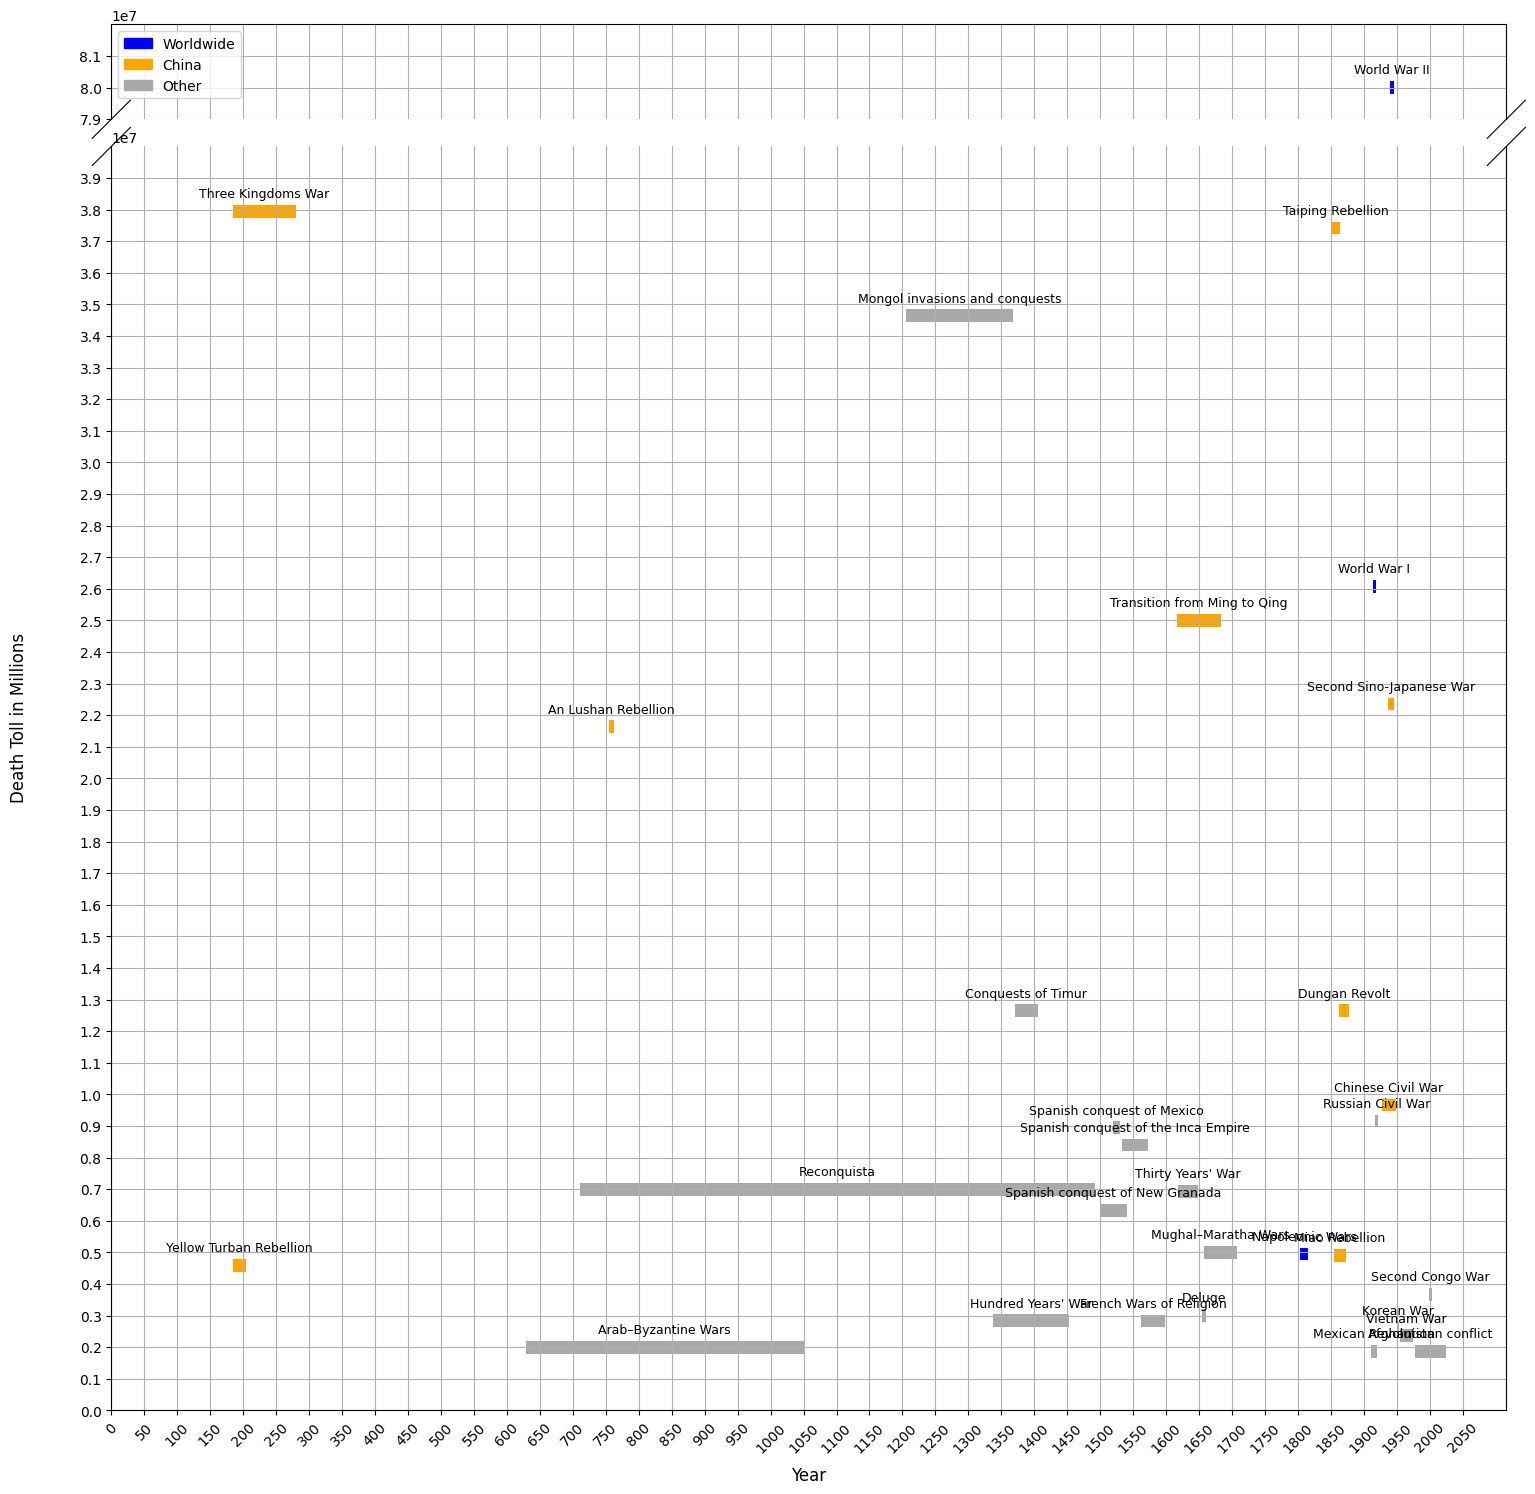

In [47]:
import locale
from brokenaxes import brokenaxes
import matplotlib.pyplot as plt
import numpy as np

# Set the locale to use commas as thousands separators
locale.setlocale(locale.LC_ALL, '')

# Sample data
# Assuming 'top30Deadliest' is your DataFrame containing the data

plt.figure(figsize=(18, 18))

# Create a dictionary to map each location to a color
location_colors = {'Worldwide': 'blue', 'China': 'orange', 'Other': 'darkgrey'}

# Create a brokenaxes instance within the figure
bax = brokenaxes(
    ylims=((0, 40000000),(79000000, 82000000)),
    hspace=.04,
    despine=False
)

# Scatter plot with color-coded bars based on 'Location_f'
locations = top30Deadliest['Location_f']
legend_labels = []
for i, (start, end, geom_mean, location) in enumerate(zip(top30Deadliest['startDate'], top30Deadliest['endDate'], top30Deadliest['geom_mean'], locations)):
    x = (start + end) / 2
    color = location_colors[location]  # Assign color based on location
    bax.barh(geom_mean, end - start, left=start, color=color, height=400000)
    
    # Add annotation
    war = top30Deadliest['War'].iloc[i]  # Access 'War' using iloc to avoid KeyError
    bax.annotate(war, xy=(x, geom_mean), xytext=(0, 10), textcoords="offset points",
                 ha='center', fontsize=9, color='black')
    
    # Collect legend labels
    if location not in legend_labels:
        legend_labels.append(location)

# Set custom y-axis tick labels for each axis with thousands separators
bax.axs[0].yaxis.set_ticks(np.arange(79000000, 82000000, 1000000))
bax.axs[1].yaxis.set_ticks(np.arange(0,40000000, 1000000)) 

bax.set_xlabel('Year', labelpad=40, fontsize=12)
bax.set_ylabel('Death Toll in Millions', labelpad=60, fontsize=12)

# Customize ticks and grid
for ax in bax.axs:
    ax.grid(which='major', axis='both')
    ax.xaxis.set_ticks(np.arange(0, 2070, 50))
    ax.xaxis.set_tick_params(labelsize=10, rotation=45)

# Create legend
legend_handles = [plt.Rectangle((0,0),1,1, color=location_colors[loc]) for loc in legend_labels]
plt.legend(legend_handles, legend_labels, loc='upper left')

plt.show()

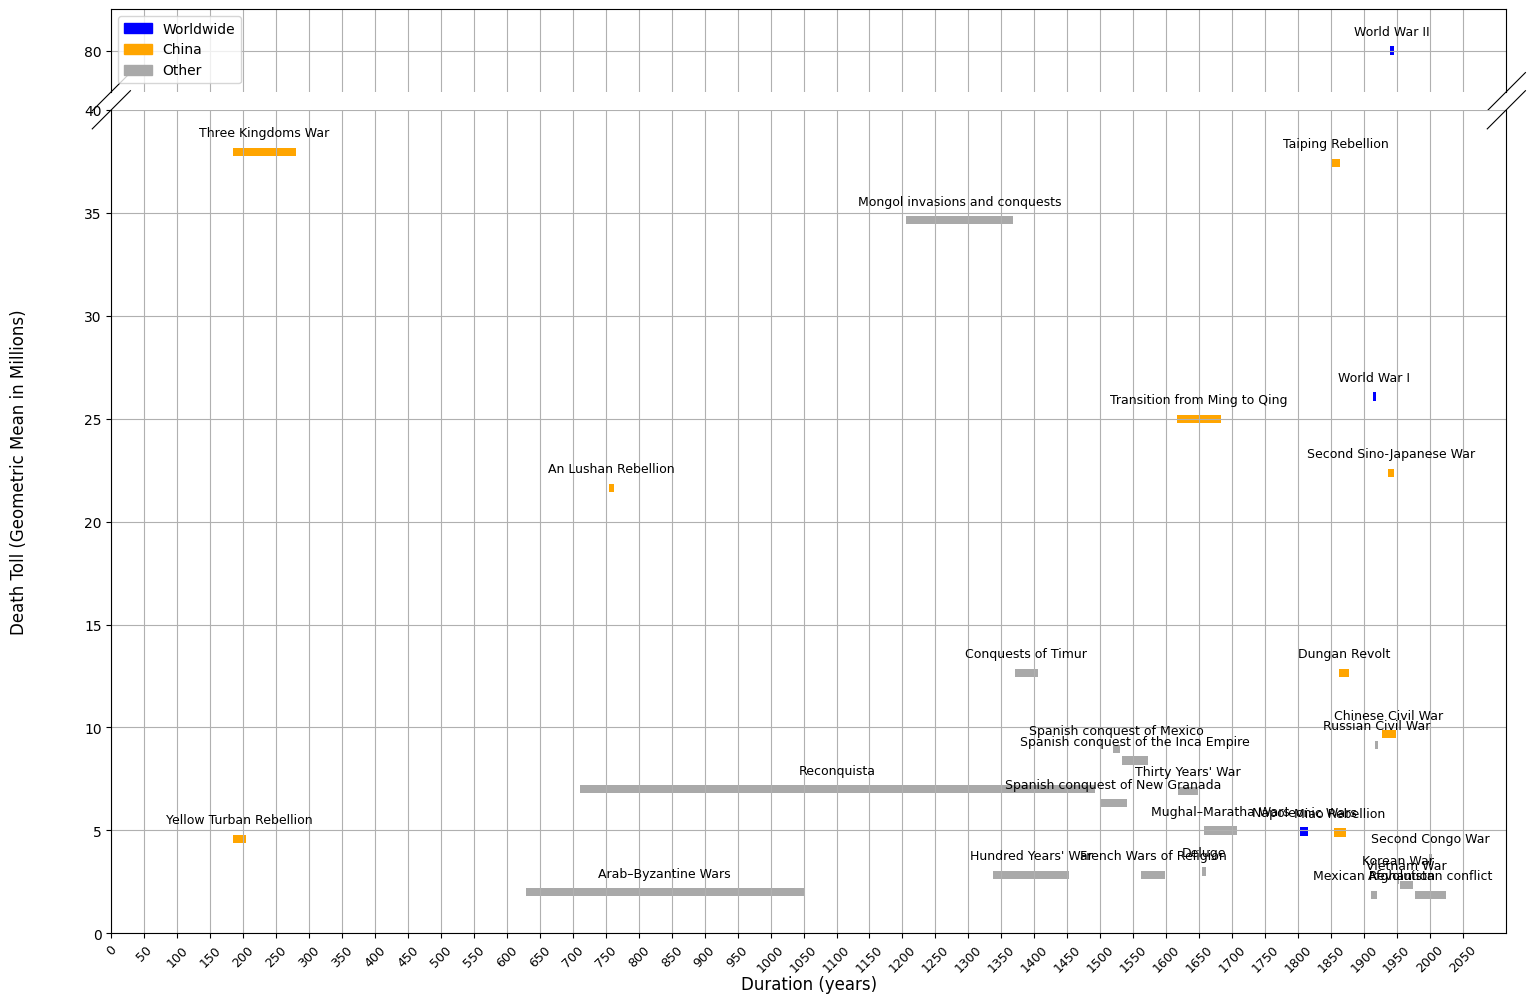

In [48]:
import locale
from brokenaxes import brokenaxes
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

# Set the locale to use commas as thousands separators
locale.setlocale(locale.LC_ALL, '')

# Function to format y-axis ticks in millions
def millions_formatter(x, pos):
    return '{:,.0f}'.format(x / 1000000)

# Sample data
# Assuming 'top30Deadliest' is your DataFrame containing the data

plt.figure(figsize=(18, 12))

# Create a dictionary to map each location to a color
location_colors = {'Worldwide': 'blue', 'China': 'orange', 'Other': 'darkgrey'}

# Create a brokenaxes instance within the figure
bax = brokenaxes(
    ylims=((0, 40000000),(78000000, 82000000)),
    hspace=.04,
    despine=False
)

# Scatter plot with color-coded bars based on 'Location_f'
locations = top30Deadliest['Location_f']
legend_labels = []
for i, (start, end, geom_mean, location) in enumerate(zip(top30Deadliest['startDate'], top30Deadliest['endDate'], top30Deadliest['geom_mean'], locations)):
    x = (start + end) / 2
    color = location_colors[location]  # Assign color based on location
    bax.barh(geom_mean, end - start, left=start, color=color, height=400000)
    
    # Add annotation
    war = top30Deadliest['War'].iloc[i]  # Access 'War' using iloc to avoid KeyError
    bax.annotate(war, xy=(x, geom_mean), xytext=(0, 11), textcoords="offset points",
                 ha='center', fontsize=9, color='black')
    
    # Collect legend labels
    if location not in legend_labels:
        legend_labels.append(location)

# Set custom y-axis tick labels for each axis with millions separators
#bax.axs[0].yaxis.set_ticks(np.arange(0, 81000000, 10000000))
#bax.axs[1].yaxis.set_ticks(np.arange(78000000, 82000000, 1000000)) 
bax.axs[0].yaxis.set_major_formatter(FuncFormatter(millions_formatter))
bax.axs[1].yaxis.set_major_formatter(FuncFormatter(millions_formatter))

bax.set_xlabel('Duration (years)', labelpad=30, fontsize=12)
bax.set_ylabel('Death Toll (Geometric Mean in Millions)', labelpad=60, fontsize=12)

# Customize ticks and grid
for ax in bax.axs:
    ax.grid(which='major', axis='both')
    ax.xaxis.set_ticks(np.arange(0, 2070, 50))
    ax.xaxis.set_tick_params(labelsize=9, rotation=45)

# Create legend
legend_handles = [plt.Rectangle((0,0),1,1, color=location_colors[loc]) for loc in legend_labels]
plt.legend(legend_handles, legend_labels, loc='upper left')

plt.show()

In [49]:
top30DeadliestA =cedf.sort_values(by = 'aritm_mean', ascending = False).head(30)

Sme but for aritmetic mean data


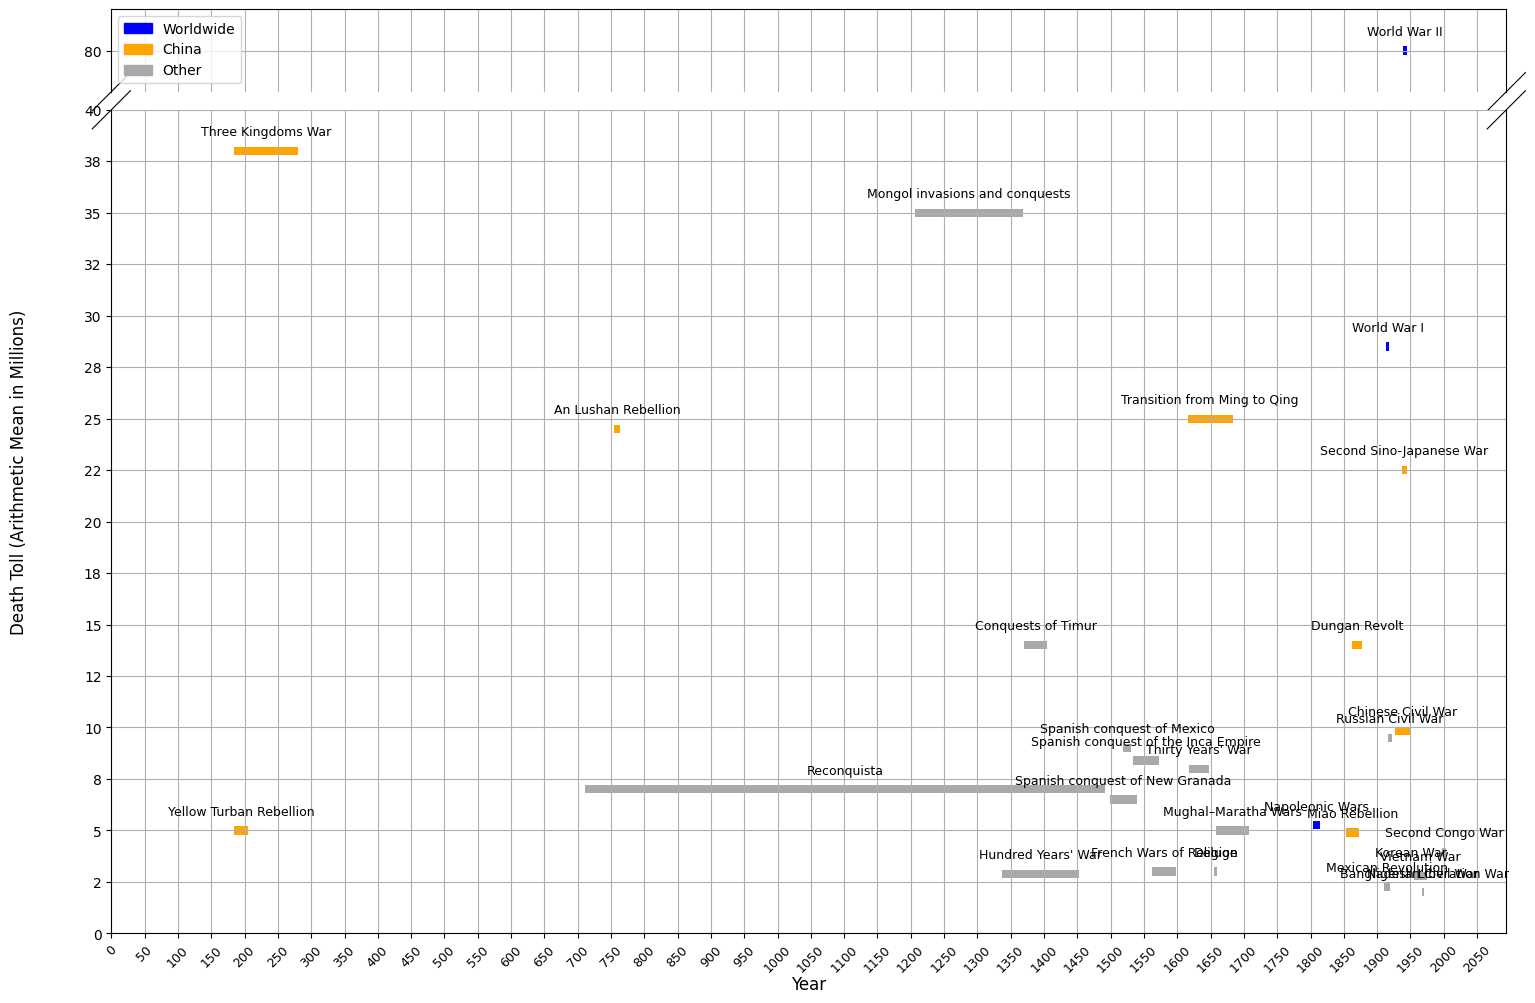

In [50]:
import locale
from brokenaxes import brokenaxes
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter, MultipleLocator

# Set the locale to use commas as thousands separators
locale.setlocale(locale.LC_ALL, '')

# Function to format y-axis ticks in millions
def millions_formatter(x, pos):
    return '{:,.0f}'.format(x / 1000000)

# Sample data
# Assuming 'top30Deadliest' is your DataFrame containing the data

plt.figure(figsize=(18, 12))

# Create a dictionary to map each location to a color
location_colors = {'Worldwide': 'blue', 'China': 'orange', 'Other': 'darkgrey'}

# Create a brokenaxes instance within the figure
bax = brokenaxes(
    ylims=((0, 40000000),(78000000, 82000000)),
    hspace=.04,
    despine=False
)

# Scatter plot with color-coded bars based on 'Location_f'
locations = top30DeadliestA['Location_f']
legend_labels = []
for i, (start, end, aritm_mean, location) in enumerate(zip(top30DeadliestA['startDate'], top30DeadliestA['endDate'], top30DeadliestA['aritm_mean'], locations)):
    x = (start + end) / 2
    color = location_colors[location]  # Assign color based on location
    bax.barh(aritm_mean, end - start, left=start, color=color, height=400000)
    
    # Add annotation
    war = top30DeadliestA['War'].iloc[i]  # Access 'War' using iloc to avoid KeyError
    bax.annotate(war, xy=(x, aritm_mean), xytext=(0, 11), textcoords="offset points",
                 ha='center', fontsize=9, color='black')
    
    # Collect legend labels
    if location not in legend_labels:
        legend_labels.append(location)



# Set custom y-axis tick labels for each axis with millions separators
bax.axs[0].yaxis.set_major_formatter(FuncFormatter(millions_formatter))
bax.axs[1].yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Set y-axis ticks every 50 million
bax.axs[0].yaxis.set_major_locator(MultipleLocator(2500000))
bax.axs[1].yaxis.set_major_locator(MultipleLocator(2500000))

bax.set_xlabel('Year', labelpad=30, fontsize=12)
bax.set_ylabel('Death Toll (Arithmetic Mean in Millions)', labelpad=60, fontsize=12)

# Customize ticks and grid
for ax in bax.axs:
    ax.grid(which='major', axis='both')
    ax.xaxis.set_ticks(np.arange(0, 2070, 50))
    ax.xaxis.set_tick_params(labelsize=9, rotation=45)

# Create legend
legend_handles = [plt.Rectangle((0,0),1,1, color=location_colors[loc]) for loc in legend_labels]
plt.legend(legend_handles, legend_labels, loc='upper left')

plt.show()

In [51]:
top30DeadliestA

,War,BC,lowerRange,higherRange,startDate,endDate,Combatants,Location,geom_mean,aritm_mean,duration,deathRateGM,deathRateAM,Location_f,startEnd,deathsFormatted
123,World War II,False,80000000,80000000,1939,1945,Allied powers vs. Axis Powers,Worldwide,80000000.00,80000000.00,7,11428571.43,11428571.43,Worldwide,(1939-1945),~80.0 millions
84,Taiping Rebellion,False,20000000,70000000,1850,1864,Qing China vs. Taiping Heavenly Kingdom,China,37416573.87,45000000.00,15,2494438.26,3000000.00,China,(1850-1864),~37.4 millions
18,Three Kingdoms War,False,36000000,40000000,184,280,Wei vs. Shu vs. Wu,China,37947331.92,38000000.00,97,391209.61,391752.58,China,(184-280),~37.9 millions
30,Mongol invasions and conquests,False,30000000,40000000,1206,1368,Mongol Empire vs. Several Eurasian states,Eurasia,34641016.15,35000000.00,163,212521.57,214723.93,Other,(1206-1368),~34.6 millions
111,World War I,False,17000000,40000000,1914,1918,Allied Powers vs. Central Powers,Worldwide,26076809.62,28500000.00,5,5215361.92,5700000.00,Worldwide,(1914-1918),~26.1 millions
50,Transition from Ming to Qing,False,25000000,25000000,1616,1683,Qing China vs. Ming China vs. peasant rebels l...,China,25000000.00,25000000.00,68,367647.06,367647.06,China,(1616-1683),~25.0 millions
25,An Lushan Rebellion,False,13000000,36000000,755,763,Tang dynasty China and Islamic Empire vs. Yan ...,China,21633307.65,24500000.00,9,2403700.85,2722222.22,China,(755-763),~21.6 millions
122,Second Sino-Japanese War,False,20000000,25000000,1937,1945,Republic of China and allies vs. Japan,China,22360679.77,22500000.00,9,2484519.97,2500000.00,China,(1937-1945),~22.4 millions
33,Conquests of Timur,False,8000000,20000000,1370,1405,Timurid Empire vs. several middle eastern states,Eurasia,12649110.64,14000000.00,36,351364.18,388888.89,Other,(1370-1405),~12.6 millions
92,Dungan Revolt,False,8000000,20000000,1862,1877,Qing China vs. Hui vs. Kashgaria,China,12649110.64,14000000.00,16,790569.42,875000.00,China,(1862-1877),~12.6 millions


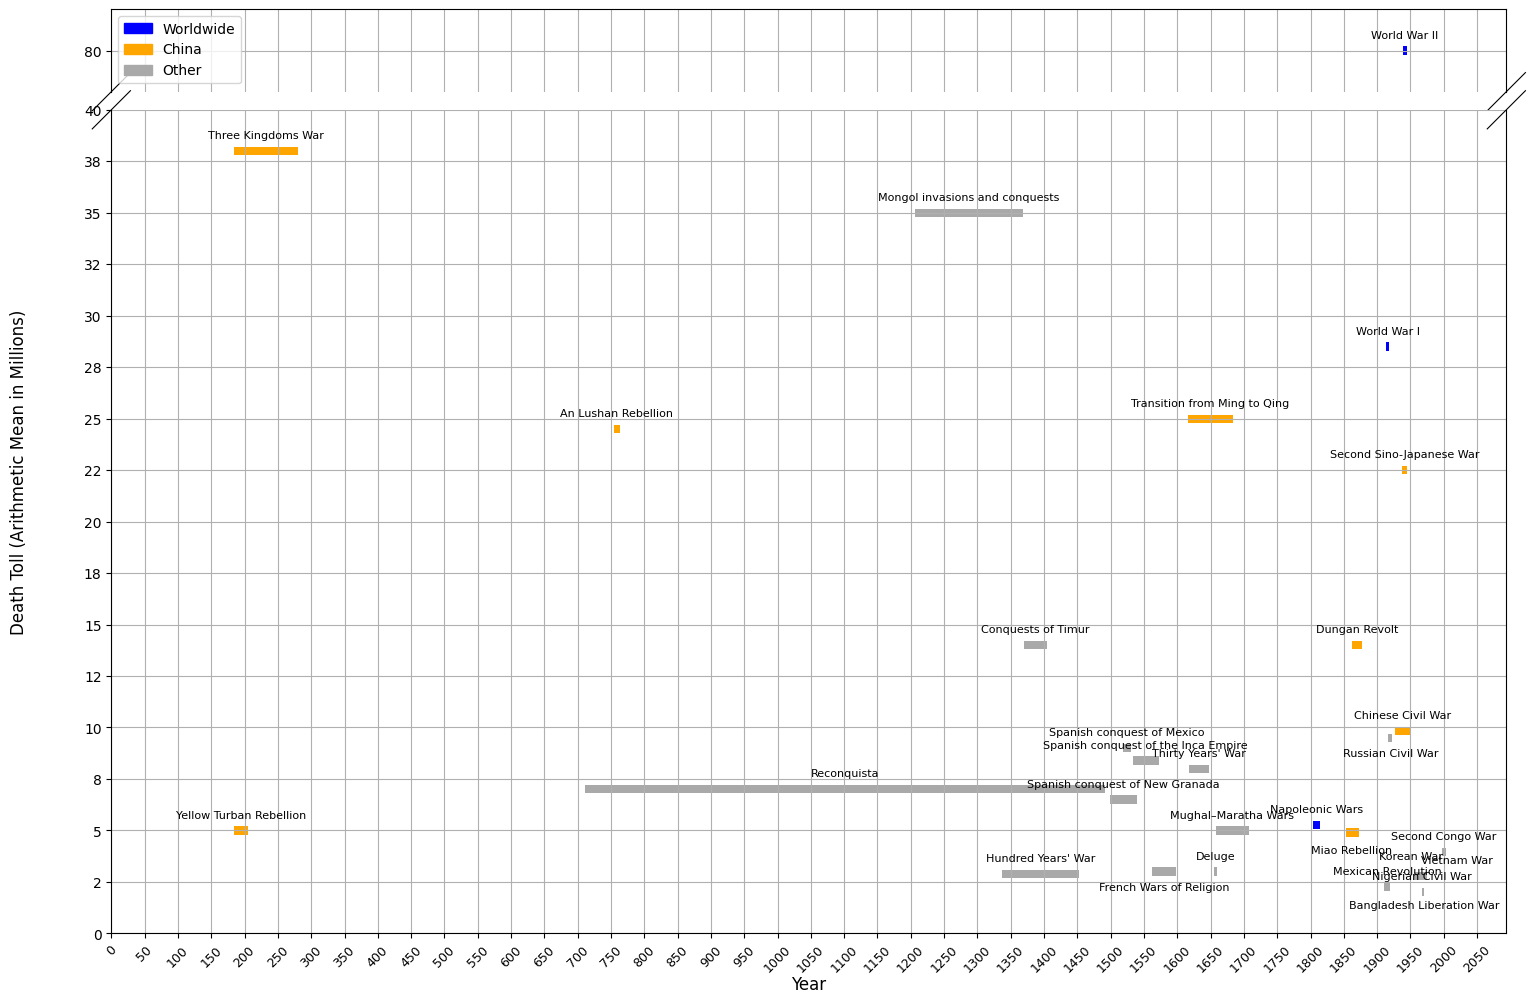

In [52]:
import locale
from brokenaxes import brokenaxes
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter, MultipleLocator

# Set the locale to use commas as thousands separators
locale.setlocale(locale.LC_ALL, '')

# Function to format y-axis ticks in millions
def millions_formatter(x, pos):
    return '{:,.0f}'.format(x / 1000000)

# Sample data
# Assuming 'top30Deadliest' is your DataFrame containing the data

plt.figure(figsize=(18, 12))

# Create a dictionary to map each location to a color
location_colors = {'Worldwide': 'blue', 'China': 'orange', 'Other': 'darkgrey'}

# Create a brokenaxes instance within the figure
bax = brokenaxes(
    ylims=((0, 40000000),(78000000, 82000000)),
    hspace=.04,
    despine=False
)




    
    # Manually adjust the position of specific labels
label_adjustments = {
    'Russian Civil War': (1919, 1922,8000000), 
  'Bangladesh Liberation War': (1971, 1971, 600000.00),
  'Miao Rebellion':(1850, 1873,3300000.00),
'French Wars of Religion':(1562,1598,1500000.00),
# 'Mexican Revolution': (1910,2.1),
# 'Tây Sơn rebellion': (1771, 1.4),
 'Nigerian Civil War': (1967,1967,2000000.00),	
    'Vietnam War': (2020,2020,2800000.00)
}  # Adjust coordinates as needed

# Remove the manually added war from the list of wars to be annotated
wars_to_annotate = top30DeadliestA[~top30DeadliestA['War'].isin(label_adjustments.keys())]

# Scatter plot with color-coded bars based on 'Location_f'
locations = top30DeadliestA['Location_f']
legend_labels = []
for i, (start, end, aritm_mean, location) in enumerate(zip(top30DeadliestA['startDate'], top30DeadliestA['endDate'], top30DeadliestA['aritm_mean'], locations)):
    x = (start + end) / 2
    color = location_colors[location]  # Assign color based on location
    bax.barh(aritm_mean, end - start, left=start, color=color, height=400000)

    
    # Collect legend labels
    if location not in legend_labels:
        legend_labels.append(location)

    
for i, (start, end, aritm_mean, location) in enumerate(zip(wars_to_annotate['startDate'], wars_to_annotate['endDate'], wars_to_annotate['aritm_mean'], locations)):
    x = (start + end) / 2    
    war = wars_to_annotate['War'].iloc[i]  # Access 'War' using iloc to avoid KeyError
    bax.annotate(war, xy=(x, aritm_mean), xytext=(0, 9), textcoords="offset points",
                 ha='center', fontsize=8, color='black')

# Manually adjust the position of specific labels
for label, (start, end, aritm_mean) in label_adjustments.items():
    x = (start + end) / 2 
    bax.annotate(label, xy=(x, aritm_mean), xytext=(0, 9), textcoords="offset points",
                 ha='center', fontsize=8, color='black')


# Set custom y-axis tick labels for each axis with millions separators
bax.axs[0].yaxis.set_major_formatter(FuncFormatter(millions_formatter))
bax.axs[1].yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Set y-axis ticks every 50 million
bax.axs[0].yaxis.set_major_locator(MultipleLocator(2500000))
bax.axs[1].yaxis.set_major_locator(MultipleLocator(2500000))

bax.set_xlabel('Year', labelpad=30, fontsize=12)
bax.set_ylabel('Death Toll (Arithmetic Mean in Millions)', labelpad=60, fontsize=12)

# Customize ticks and grid
for ax in bax.axs:
    ax.grid(which='major', axis='both')
    ax.xaxis.set_ticks(np.arange(0, 2070, 50))
    ax.xaxis.set_tick_params(labelsize=9, rotation=45)

# Create legend
legend_handles = [plt.Rectangle((0,0),1,1, color=location_colors[loc]) for loc in legend_labels]
plt.legend(legend_handles, legend_labels, loc='upper left')

plt.show()

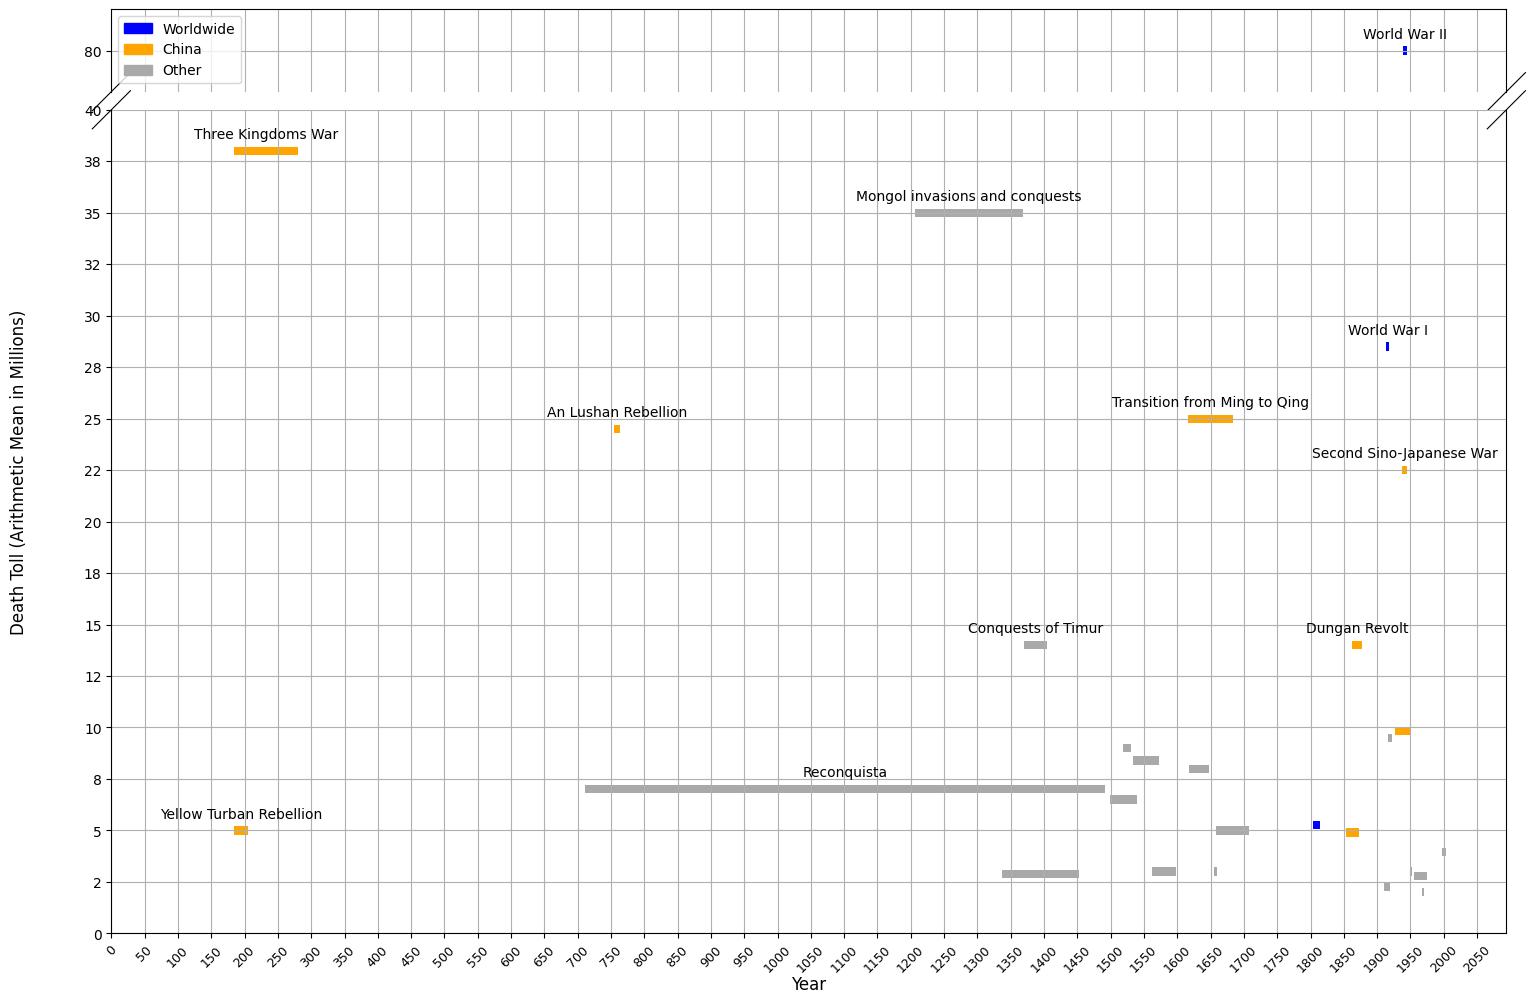

In [60]:
#ok, the manual labeling is too tedious, I will just zoom in


import locale
from brokenaxes import brokenaxes
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter, MultipleLocator

# Set the locale to use commas as thousands separators
locale.setlocale(locale.LC_ALL, '')

# Function to format y-axis ticks in millions
def millions_formatter(x, pos):
    return '{:,.0f}'.format(x / 1000000)

# Sample data
# Assuming 'top30Deadliest' is your DataFrame containing the data

plt.figure(figsize=(18, 12))

# Create a dictionary to map each location to a color
location_colors = {'Worldwide': 'blue', 'China': 'orange', 'Other': 'darkgrey'}

# Create a brokenaxes instance within the figure
bax = brokenaxes(
    ylims=((0, 40000000),(78000000, 82000000)),
    hspace=.04,
    despine=False
)




    

# Remove the manually added war from the list of wars to be annotated
wars_not_to_annotate = top30DeadliestA[(top30DeadliestA['startDate']>1300) &(top30DeadliestA['aritm_mean']<10000000)]
wars_to_annotate =top30DeadliestA[~top30DeadliestA['War'].isin(wars_not_to_annotate['War'])]
# Scatter plot with color-coded bars based on 'Location_f'
locations = top30DeadliestA['Location_f']
legend_labels = []
for i, (start, end, aritm_mean, location) in enumerate(zip(top30DeadliestA['startDate'], top30DeadliestA['endDate'], top30DeadliestA['aritm_mean'], locations)):
    x = (start + end) / 2
    color = location_colors[location]  # Assign color based on location
    bax.barh(aritm_mean, end - start, left=start, color=color, height=400000)

    
    # Collect legend labels
    if location not in legend_labels:
        legend_labels.append(location)

    
for i, (start, end, aritm_mean, location) in enumerate(zip(wars_to_annotate['startDate'], wars_to_annotate['endDate'], wars_to_annotate['aritm_mean'], locations)):
    x = (start + end) / 2    
    war = wars_to_annotate['War'].iloc[i]  # Access 'War' using iloc to avoid KeyError
    bax.annotate(war, xy=(x, aritm_mean), xytext=(0, 9), textcoords="offset points",
                 ha='center', fontsize=10, color='black')



# Set custom y-axis tick labels for each axis with millions separators
bax.axs[0].yaxis.set_major_formatter(FuncFormatter(millions_formatter))
bax.axs[1].yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Set y-axis ticks every 50 million
bax.axs[0].yaxis.set_major_locator(MultipleLocator(2500000))
bax.axs[1].yaxis.set_major_locator(MultipleLocator(2500000))

bax.set_xlabel('Year', labelpad=30, fontsize=12)
bax.set_ylabel('Death Toll (Arithmetic Mean in Millions)', labelpad=60, fontsize=12)

# Customize ticks and grid
for ax in bax.axs:
    ax.grid(which='major', axis='both')
    ax.xaxis.set_ticks(np.arange(0, 2070, 50))
    ax.xaxis.set_tick_params(labelsize=9, rotation=45)

# Create legend
legend_handles = [plt.Rectangle((0,0),1,1, color=location_colors[loc]) for loc in legend_labels]
plt.legend(legend_handles, legend_labels, loc='upper left')

plt.show()

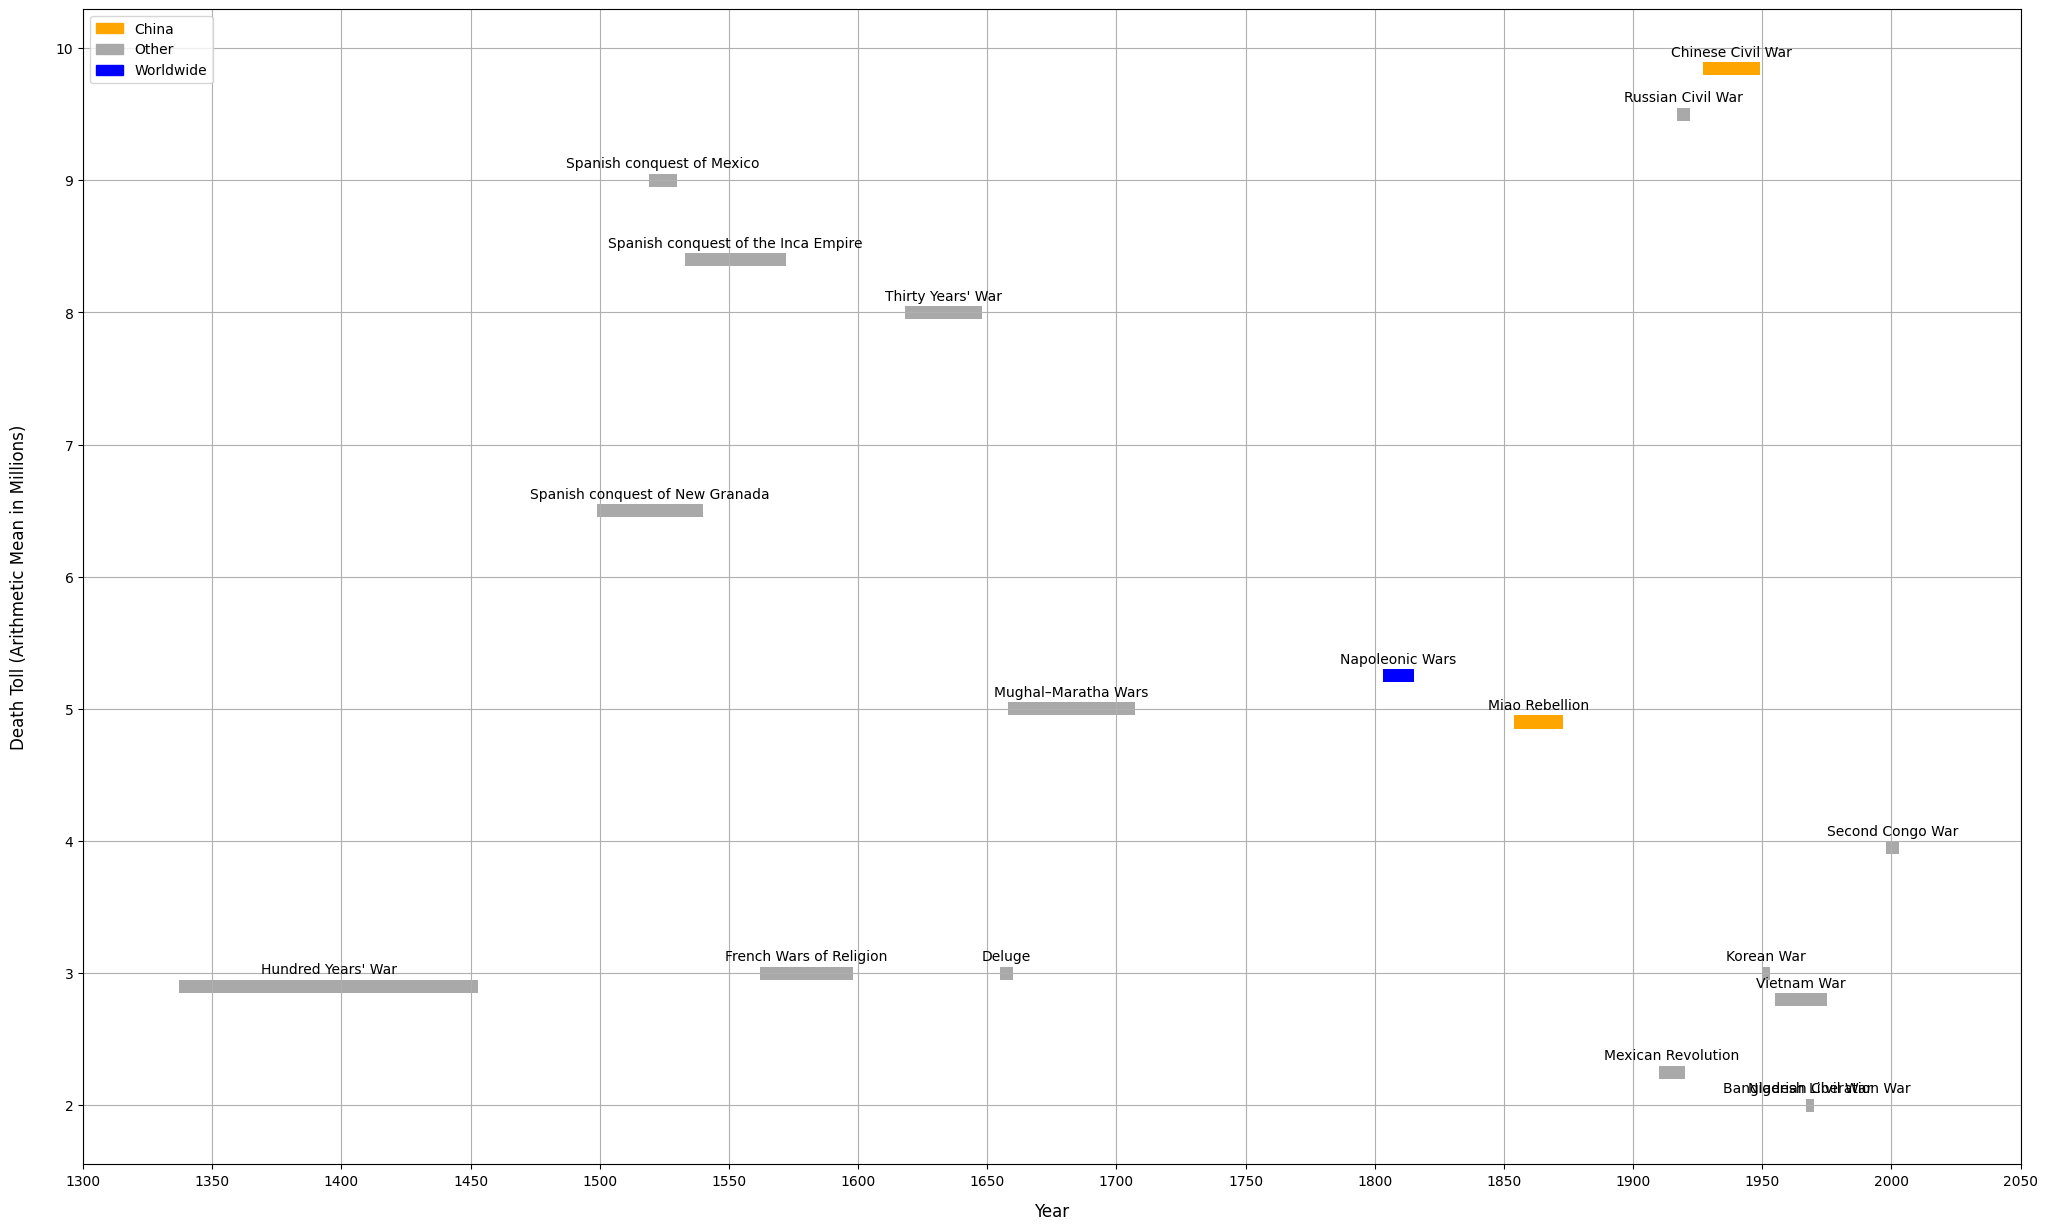

In [64]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter, MultipleLocator

plt.figure(figsize=(18, 12))

# Create a dictionary to map each location to a color
location_colors = {'Worldwide': 'blue', 'China': 'orange', 'Other': 'darkgrey'}


# Function to format y-axis ticks in millions
def millions_formatter(x, pos):
    return '{:,.0f}'.format(x / 1000000)
# zoomed in data

#wars_not_to_annotate 
# Scatter plot with color-coded bars based on 'Location_f'
locations = wars_not_to_annotate['Location_f']
legend_labels = []
for i, (start, end, aritm_mean, location) in enumerate(zip(wars_not_to_annotate['startDate'], wars_not_to_annotate['endDate'], wars_not_to_annotate['aritm_mean'], locations)):
    x = (start + end) / 2
    color = location_colors[location]  # Assign color based on location
    plt.barh(aritm_mean, end - start, left=start, color=color, height=100000)

    
    # Collect legend labels
    if location not in legend_labels:
        legend_labels.append(location)

    
for i, (start, end, aritm_mean, location) in enumerate(zip(wars_not_to_annotate['startDate'], wars_not_to_annotate['endDate'], wars_not_to_annotate['aritm_mean'], locations)):
    x = (start + end) / 2    
    war = wars_not_to_annotate['War'].iloc[i]  # Access 'War' using iloc to avoid KeyError
    plt.annotate(war, xy=(x, aritm_mean), xytext=(0, 9), textcoords="offset points",
                 ha='center', fontsize=10, color='black')



plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.gca().xaxis.set_major_locator(MultipleLocator(50))

plt.grid(which='major', axis='both')
# plt.xaxis.set_ticks(np.arange(1300, 2060, 50))
# plt.xaxis.set_tick_params(labelsize=9, rotation=45)

# Create legend
legend_handles = [plt.Rectangle((0,0),1,1, color=location_colors[loc]) for loc in legend_labels]
plt.legend(legend_handles, legend_labels, loc='upper left')


plt.xlabel('Year', labelpad=10, fontsize=12)
plt.ylabel('Death Toll (Arithmetic Mean in Millions)', labelpad=20, fontsize=12)

plt.xlim(1300, 2050)


plt.show()

### Final graph

The below graph shows 30 most deadly wars CE as per Wikipedia data I used. The deadliness is calculated by using the arithmetic mean of the low and high death toll estimate (using geometric mean gives similar results). I wanted to draw attention to how many big wars happened in China, something that is neglected during history classes in Europe as far as I'm aware.

A few points to note:

1. WW2 is a big outlier. I chose to break axes to fit it neatly in the graph but one may argue it distracts from the size of the actual number.
2. WW2 and SinoJapanese
3. Nigerian and Bangladash overlap
4. Reconquista debate

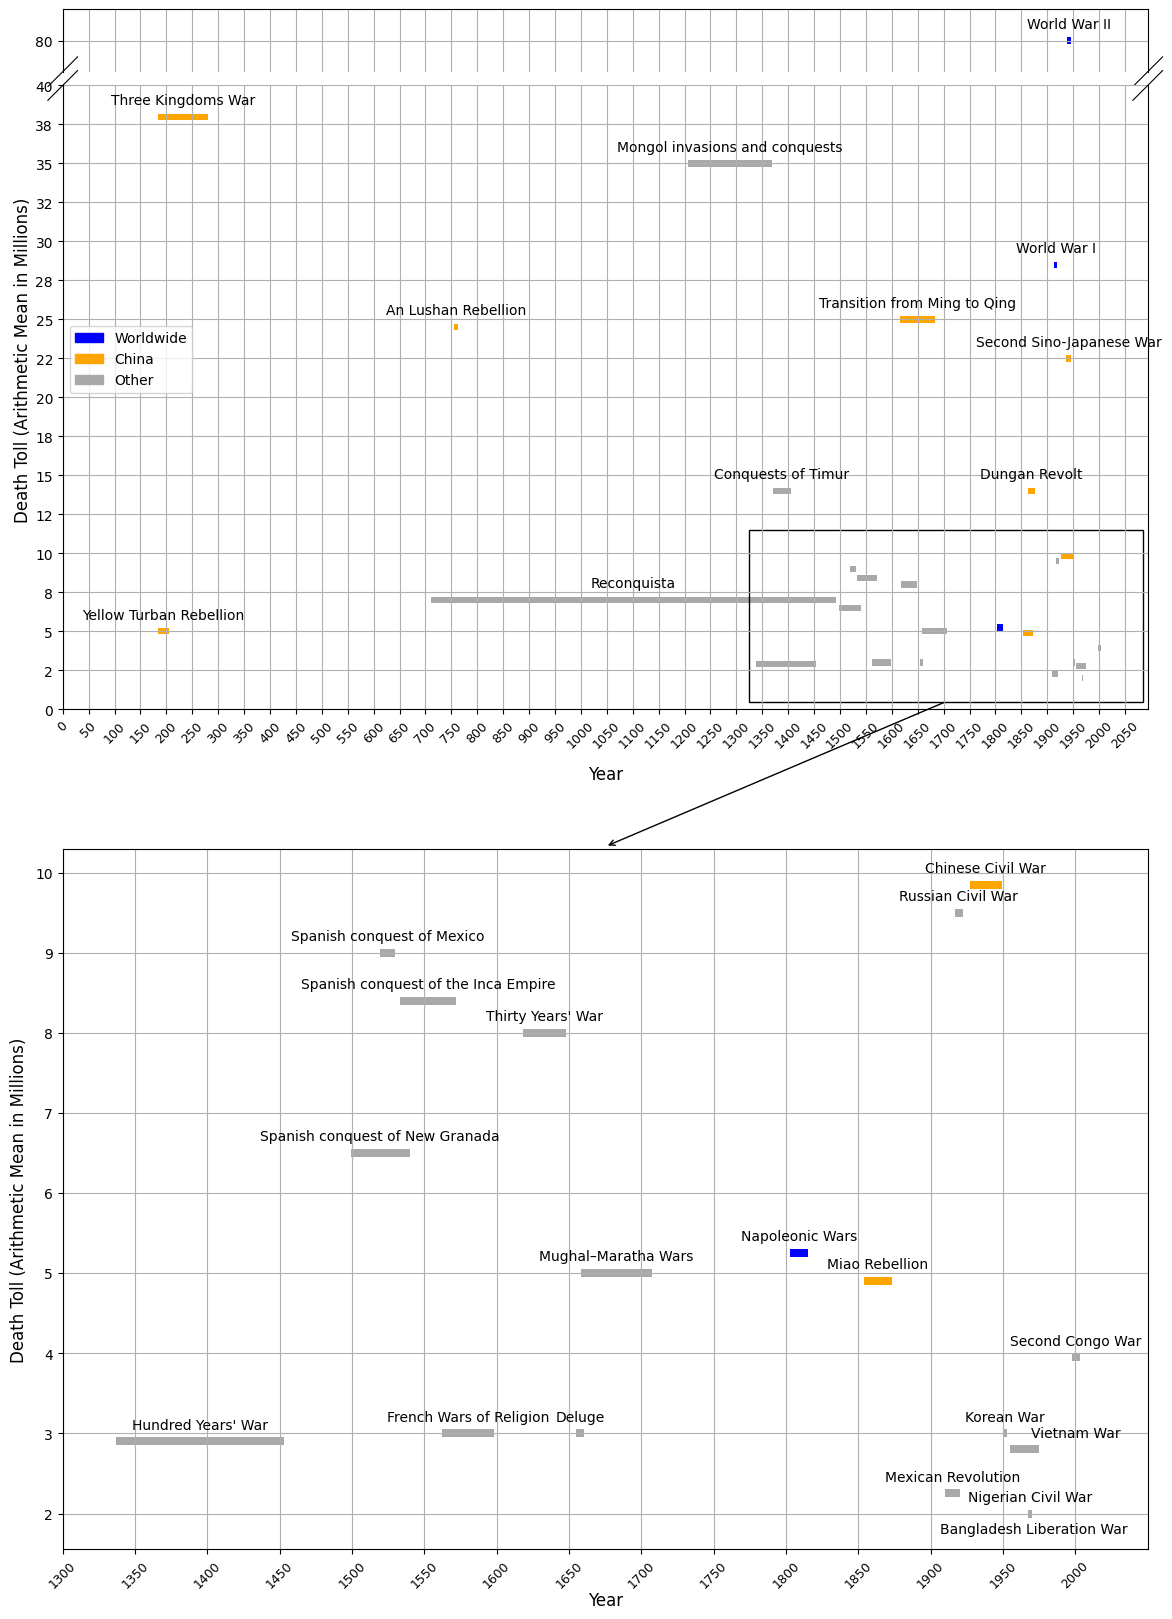

In [201]:
from brokenaxes import brokenaxes
from matplotlib.gridspec import GridSpec
import numpy as np

#grid with 2 subplots and 1 column
sps1, sps2 = GridSpec(2,1)
fig = plt.figure(figsize=(14, 20))

#common functions and variables:

# Function to format y-axis ticks in millions
def millions_formatter(x, pos):
    return '{:,.0f}'.format(x / 1000000)

# Create a dictionary to map each location to a color
location_colors = {'Worldwide': 'blue', 'China': 'orange', 'Other': 'darkgrey'}

# Remove the manually added war from the list of wars to be annotated
wars_not_to_annotate = top30DeadliestA[(top30DeadliestA['startDate']>1300) &(top30DeadliestA['aritm_mean']<10000000)]
wars_to_annotate =top30DeadliestA[~top30DeadliestA['War'].isin(wars_not_to_annotate['War'])]

############################# SUBPLOT 1 ################################################
#define first subplot
bax = brokenaxes(ylims=((0, 40000000), (78000000, 82000000)), hspace=.04, despine=False, subplot_spec=sps1)

# Scatter plot with color-coded bars based on 'Location_f'
locations = top30DeadliestA['Location_f']
legend_labels = []
for i, (start, end, aritm_mean, location) in enumerate(zip(top30DeadliestA['startDate'], top30DeadliestA['endDate'], top30DeadliestA['aritm_mean'], locations)):
    x = (start + end) / 2
    color = location_colors[location]  # Assign color based on location
    bax.barh(aritm_mean, end - start, left=start, color=color, height=400000)

    # Collect legend labels
    if location not in legend_labels:
        legend_labels.append(location)

for i, (start, end, aritm_mean, location) in enumerate(zip(wars_to_annotate['startDate'], wars_to_annotate['endDate'], wars_to_annotate['aritm_mean'], locations)):
    x = (start + end) / 2    
    war = wars_to_annotate['War'].iloc[i]  # Access 'War' using iloc to avoid KeyError
    bax.annotate(war, xy=(x, aritm_mean), xytext=(0, 9), textcoords="offset points",
                 ha='center', fontsize=10, color='black')

# Set custom y-axis tick labels for each axis with millions separators
bax.axs[0].yaxis.set_major_formatter(FuncFormatter(millions_formatter))
bax.axs[1].yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Set y-axis ticks every 50 million
bax.axs[0].yaxis.set_major_locator(MultipleLocator(2500000))
bax.axs[1].yaxis.set_major_locator(MultipleLocator(2500000))

bax.set_xlabel('Year', labelpad=40, fontsize=12)
bax.set_ylabel('Death Toll (Arithmetic Mean in Millions)', labelpad=22, fontsize=12)

# Customize ticks and grid
for ax in bax.axs:
    ax.grid(which='major', axis='both')
    ax.xaxis.set_ticks(np.arange(0, 2070, 50))
    ax.xaxis.set_tick_params(labelsize=9, rotation=45)

# Create legend
legend_handles = [plt.Rectangle((0,0),1,1, color=location_colors[loc]) for loc in legend_labels]
ax_main.legend(legend_handles, legend_labels, loc='upper left')



# Create a rectangle patch
rect = patches.Rectangle((1325, 500000), 760, 11000000, edgecolor='black', facecolor='none')

# Add the rectangle patch to the subplot
bax.axs[1].add_patch(rect)

# Add annotation with arrow pointing down from the rectangle to the second subplot
bax.axs[1].annotate('', xy=(1325 + 760 / 2, 500000), xycoords='data',
                    xytext=(0.5, -0.22), textcoords='axes fraction',
                    arrowprops=dict(arrowstyle='<-', color='black'),
                    ha='center')

# Create legend
legend_handles = [plt.Rectangle((0,0),1,1, color=location_colors[loc]) for loc in legend_labels]
bax.legend(legend_handles, legend_labels, loc='center left')
############################# SUBPLOT 2 ################################################

bax = brokenaxes(xlims=[(1300, 2050)], despine = False, subplot_spec=sps2)#despine has to be false to have all borders


    # Manually adjust the position of specific labels
label_adjustments = {
'Bangladesh Liberation War': (1971, 1971, 1600000.00),
'Vietnam War': (2000, 2000, 2800000.00)

}

zoomed_wars_to_annotate = wars_not_to_annotate[~wars_not_to_annotate['War'].isin(label_adjustments.keys())]

locations2 = wars_not_to_annotate['Location_f']
legend_labels = []

for i, (start, end, aritm_mean, location2) in enumerate(zip(wars_not_to_annotate['startDate'], wars_not_to_annotate['endDate'], wars_not_to_annotate['aritm_mean'], locations2)):
    x = (start + end) / 2
    color = location_colors[location2]  # Assign color based on location
    bax.barh(aritm_mean, end - start, left=start, color=color, height=100000)

    # Collect legend labels
    if location not in legend_labels:
        legend_labels.append(location)

for i, (start, end, aritm_mean, location) in enumerate(zip(zoomed_wars_to_annotate['startDate'], zoomed_wars_to_annotate['endDate'], zoomed_wars_to_annotate['aritm_mean'], locations)):
    x = (start + end) / 2    
    war = zoomed_wars_to_annotate['War'].iloc[i]  # Access 'War' using iloc to avoid KeyError
    bax.annotate(war, xy=(x, aritm_mean), xytext=(0, 9), textcoords="offset points",
                 ha='center', fontsize=10, color='black')


    
    # Manually adjust the position of specific labels
for label, (start, end, aritm_mean) in label_adjustments.items():
    x = (start + end) / 2 
    bax.annotate(label, xy=(x, aritm_mean), xytext=(0, 9), textcoords="offset points",
                 ha='center', fontsize=10, color='black')
# Set custom y-axis tick labels for each axis with millions separators
bax.axs[0].yaxis.set_major_formatter(FuncFormatter(millions_formatter))


# Customize ticks and grid
for ax in bax.axs:
    ax.grid(which='major', axis='both')
    ax.xaxis.set_ticks(np.arange(1300, 2050, 50))
    ax.xaxis.set_tick_params(labelsize=9, rotation=45)


bax.set_xlabel('Year', labelpad=30, fontsize=12)
bax.set_ylabel('Death Toll (Arithmetic Mean in Millions)', labelpad=25, fontsize=12)


plt.show()
